<a href="https://colab.research.google.com/github/biorider/AMR-Missing-Risk/blob/main/The%20Missing_Risk_AI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported.
Created 'figures' directory for saving plots.
Successfully loaded synthetic_patient_data.csv

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                10000 non-null  int64 
 1   comorbidity_score  10000 non-null  int64 
 2   is_smoker          10000 non-null  object
 3   pathogen           10000 non-null  object
 4   amr_status         10000 non-null  object
 5   mortality_30day    10000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 468.9+ KB

Data Head:
   age  comorbidity_score is_smoker               pathogen   amr_status  \
0   69                  1        No       Escherichia coli  Susceptible   
1   59                  0        No  Klebsiella pneumoniae  Susceptible   
2   71                  0       Yes       Escherichia coli  Susceptible   
3   84                  0   

/tmp/ipython-input-4262136856.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='amr_status', y='mortality_30day', data=mortality_by_amr, ax=axes1[0, 0], palette={'Susceptible': '#34a853', 'Resistant': '#ea4335'})
/tmp/ipython-input-4262136856.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='comorbidity_score', data=df, ax=axes1[0, 1], palette='Blues_d')
/tmp/ipython-input-4262136856.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pathogen', data=df, ax=axes1[1, 0], palette='Greens_d')


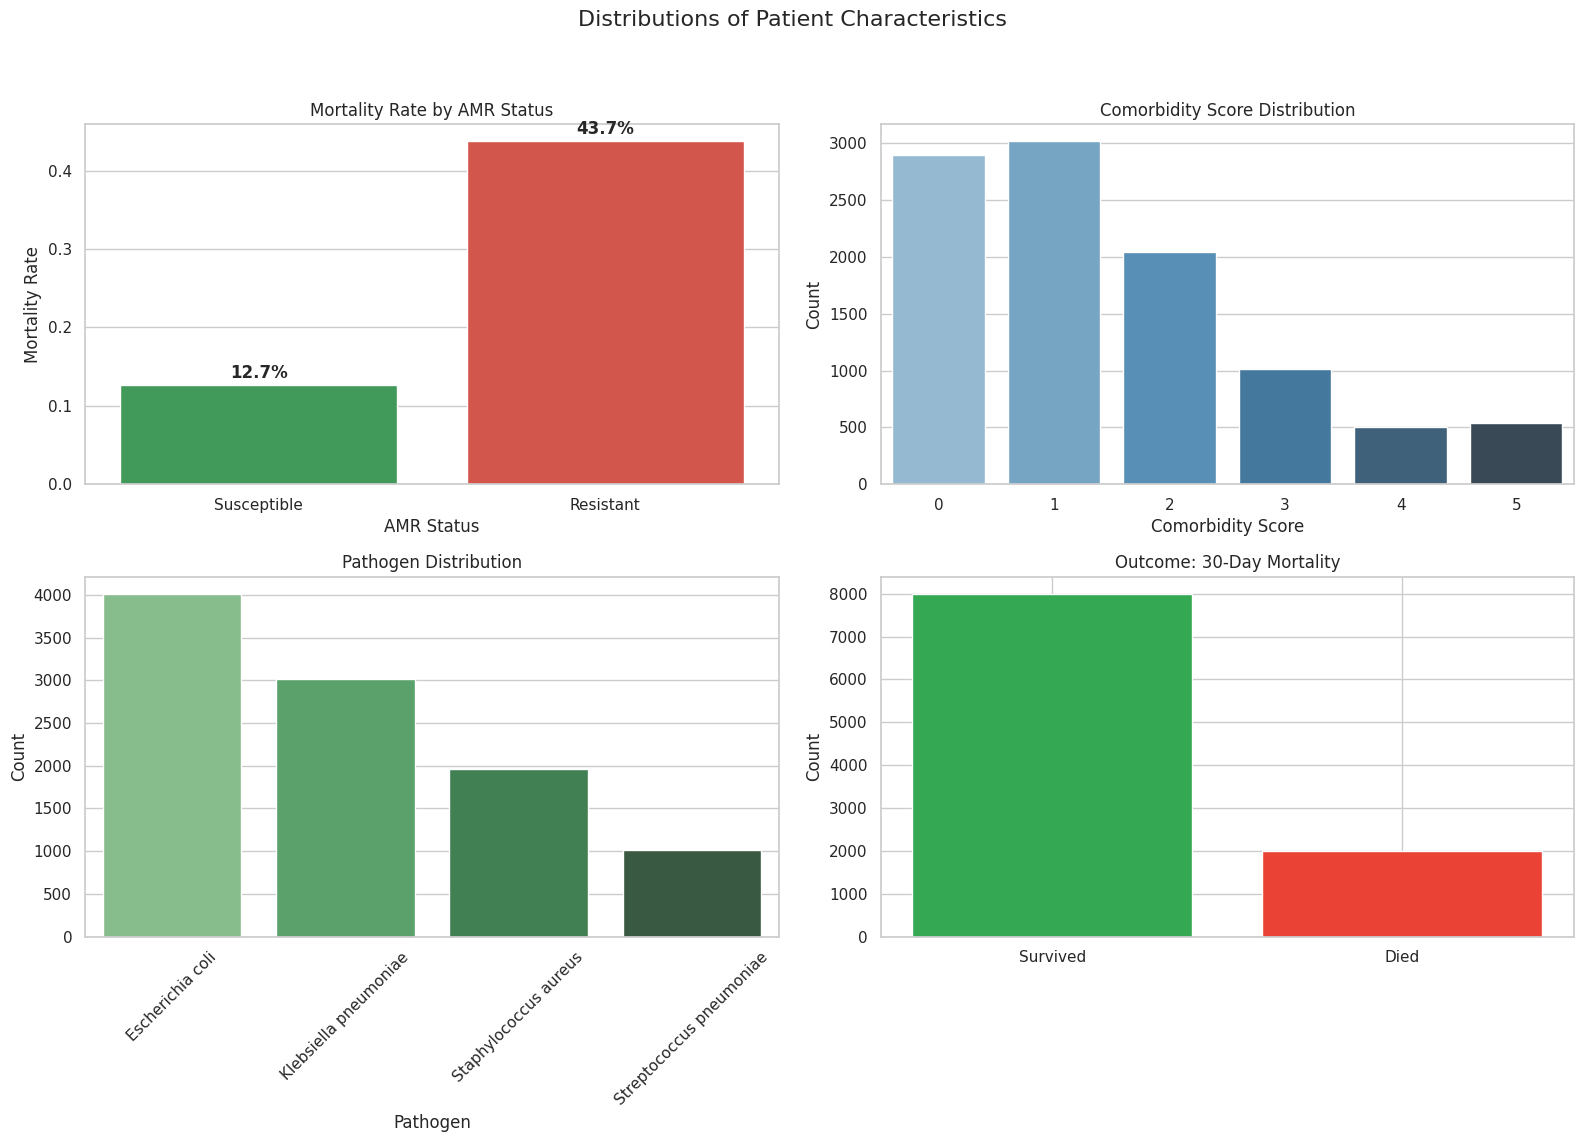

Saved figures/figure1_univariate_analysis.png (DPI 300)

Generating core discovery plot: AMR vs. Mortality...
Mortality Rate by AMR Status:
    amr_status  mortality_30day
1  Susceptible         0.126506
0    Resistant         0.436971


/tmp/ipython-input-4262136856.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='amr_status', y='mortality_30day', data=mortality_by_amr, palette={'Susceptible': '#34a853', 'Resistant': '#ea4335'})


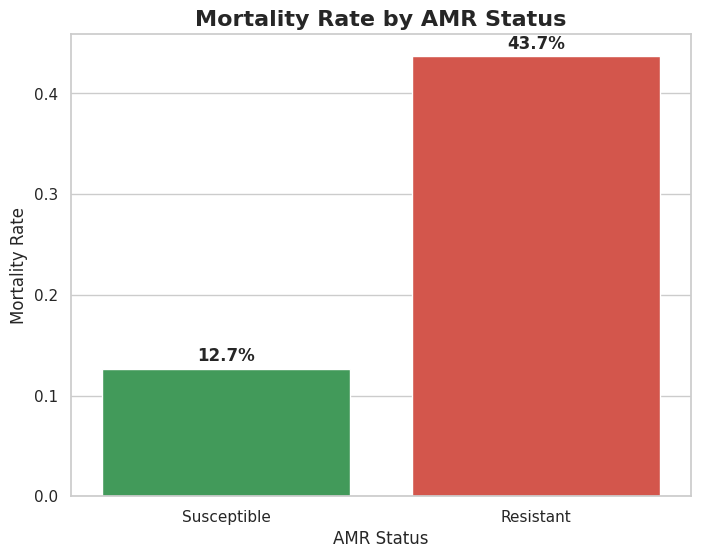

Saved figures/figure2_amr_mortality.png (DPI 300)

Generating plots for other risk factors...


/tmp/ipython-input-4262136856.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='comorbidity_score', y='mortality_30day', data=df, ax=axes3[1], palette='coolwarm')


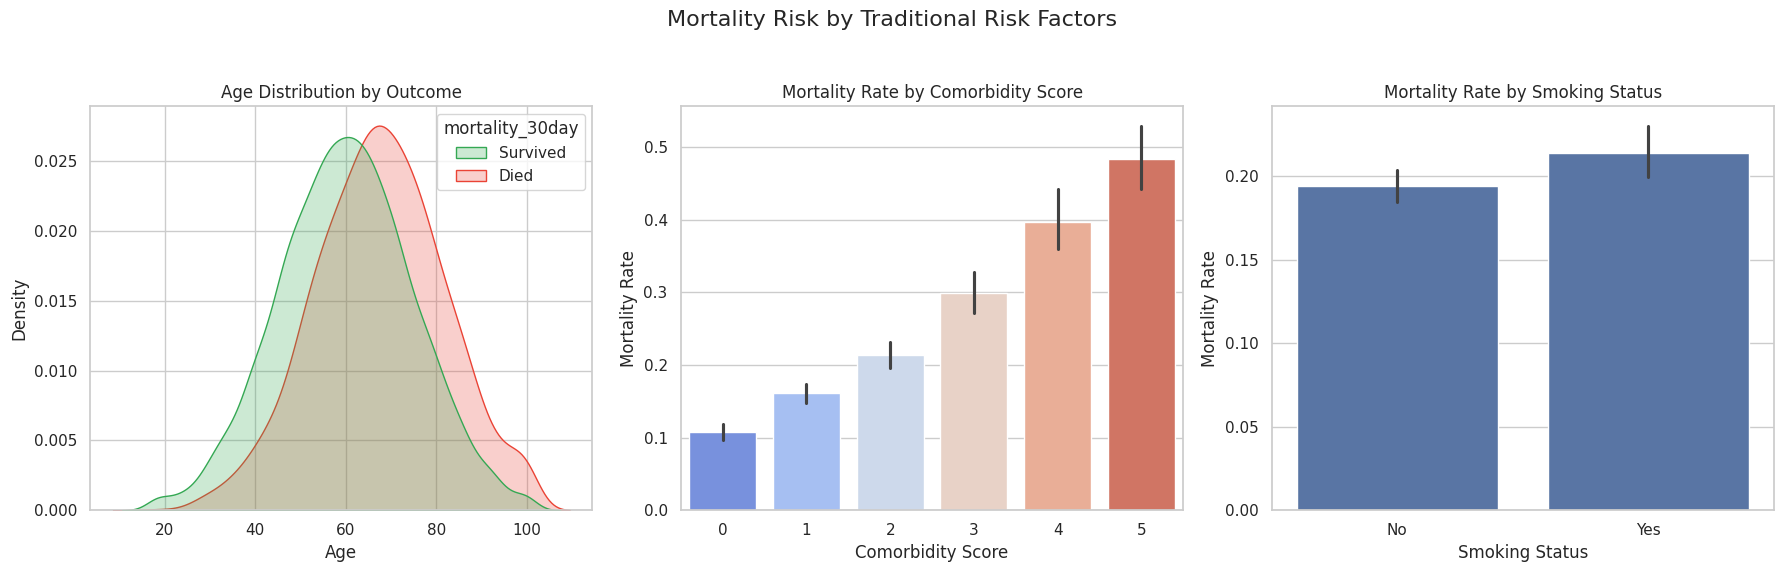

Saved figures/figure3_other_risk_factors.png (DPI 300)

Starting feature engineering...
Original DataFrame shape: (10000, 6)
Original columns: ['age', 'comorbidity_score', 'is_smoker', 'pathogen', 'amr_status', 'mortality_30day']

Processed DataFrame shape: (10000, 8)
Processed columns: ['age', 'comorbidity_score', 'mortality_30day', 'pathogen_Klebsiella pneumoniae', 'pathogen_Staphylococcus aureus', 'pathogen_Streptococcus pneumoniae', 'amr_status_Susceptible', 'is_smoker_Yes']
   age  comorbidity_score  mortality_30day  pathogen_Klebsiella pneumoniae  \
0   69                  1                0                               0   
1   59                  0                0                               1   
2   71                  0                0                               0   
3   84                  0                0                               1   
4   58                  1                0                               1   

   pathogen_Staphylococcus aureus  pathogen_Str

<Figure size 1400x1000 with 0 Axes>

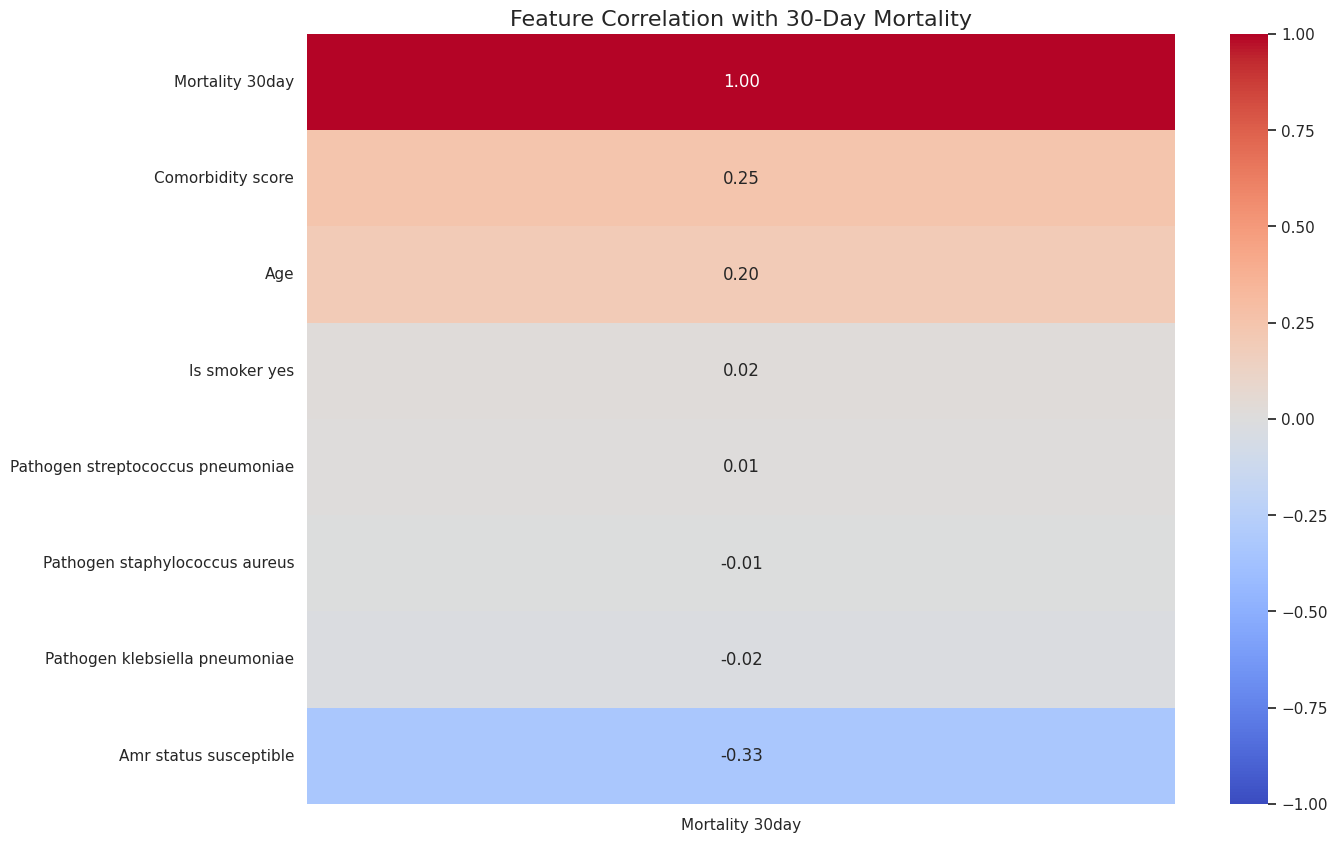


Features most correlated with Mortality:
                                   Mortality 30day
Mortality 30day                           1.000000
Comorbidity score                         0.249754
Age                                       0.198929
Is smoker yes                             0.022944
Pathogen streptococcus pneumoniae         0.013332
Pathogen staphylococcus aureus           -0.006431
Pathogen klebsiella pneumoniae           -0.023265
Amr status susceptible                   -0.329831
Saved figures/figure4_correlation_heatmap.png (DPI 300)

Successfully saved processed data to processed_patient_data.csv
This file is now ready for Step 3: Model Development.


In [ ]:
# Research Initiative 3: The "Missing Risk" AI Model
# Step 2: Exploratory Data Analysis (EDA) & Feature Engineering
#
# This script loads `synthetic_patient_data.csv`, analyzes it,
# prepares it for modeling, and saves the result as
# `processed_patient_data.csv`.

# %%
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a nice style for our plots
sns.set_theme(style="whitegrid")
print("Libraries imported.")

# Create a directory to save figures
if not os.path.exists('figures'):
    os.makedirs('figures')
    print("Created 'figures' directory for saving plots.")

# %%
# --- 2. Load and Inspect Data ---
input_filename = 'synthetic_patient_data.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"Successfully loaded {input_filename}")
except FileNotFoundError:
    print(f"ERROR: {input_filename} not found. Please upload it to the Colab environment first by clicking on the folder icon on the left sidebar, then clicking the 'Upload to session storage' icon.")
    # In a script, we might exit, but here we'll let it continue
    # and it will fail on the next step if the file is missing.
    df = pd.DataFrame() # Create empty df to avoid immediate crash

if not df.empty:
    print("\nData Info:")
    df.info()

    print("\nData Head:")
    print(df.head())

# %%
# --- 3. Univariate Analysis (Exploring Single Variables) ---
print("\nGenerating univariate analysis plots...")

# Check if df is empty before plotting
if not df.empty:
    fig1, axes1 = plt.subplots(2, 2, figsize=(16, 12))
    fig1.suptitle('Distributions of Patient Characteristics', fontsize=16)

    # Plot Mortality Rate by AMR Status (replacing Age Distribution)
    mortality_by_amr = df.groupby('amr_status')['mortality_30day'].mean().reset_index()
    mortality_by_amr = mortality_by_amr.sort_values('amr_status', ascending=False)
    sns.barplot(x='amr_status', y='mortality_30day', data=mortality_by_amr, ax=axes1[0, 0], palette={'Susceptible': '#34a853', 'Resistant': '#ea4335'})
    axes1[0, 0].set_title('Mortality Rate by AMR Status')
    axes1[0, 0].set_ylabel('Mortality Rate')
    axes1[0, 0].set_xlabel('AMR Status')
    # Add annotations
    for p in axes1[0, 0].patches:
        axes1[0, 0].annotate(f'{p.get_height():.1%}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points', weight='bold')


    # Plot Comorbidity Score
    sns.countplot(x='comorbidity_score', data=df, ax=axes1[0, 1], palette='Blues_d')
    axes1[0, 1].set_title('Comorbidity Score Distribution')
    axes1[0, 1].set_xlabel('Comorbidity Score')
    axes1[0, 1].set_ylabel('Count')


    # Plot Pathogen Distribution
    sns.countplot(x='pathogen', data=df, ax=axes1[1, 0], palette='Greens_d')
    axes1[1, 0].set_title('Pathogen Distribution')
    axes1[1, 0].set_xlabel('Pathogen')
    axes1[1, 0].set_ylabel('Count')
    axes1[1, 0].tick_params(axis='x', rotation=45)

    # Plot Target Variable: Mortality
    mortality_counts = df['mortality_30day'].map({0: 'Survived', 1: 'Died'}).value_counts()
    axes1[1, 1].bar(mortality_counts.index, mortality_counts.values, color=['#34a853', '#ea4335'])
    axes1[1, 1].set_title('Outcome: 30-Day Mortality')
    axes1[1, 1].set_ylabel('Count')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Save Figure 1
    fig1.savefig('figures/figure1_univariate_analysis.png', dpi=300, bbox_inches='tight')
    print("Saved figures/figure1_univariate_analysis.png (DPI 300)")

else:
    print("Skipping univariate analysis: DataFrame is empty.")

# %%
# --- 4. Bivariate Analysis: Finding the "Missing Risk" ---
print("\nGenerating core discovery plot: AMR vs. Mortality...")

# Check if df is empty before plotting
if not df.empty:
    # Calculate mortality rates
    mortality_by_amr = df.groupby('amr_status')['mortality_30day'].mean().reset_index()
    mortality_by_amr = mortality_by_amr.sort_values('amr_status', ascending=False)

    print("Mortality Rate by AMR Status:")
    print(mortality_by_amr)

    # Plot the rates
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    ax2 = sns.barplot(x='amr_status', y='mortality_30day', data=mortality_by_amr, palette={'Susceptible': '#34a853', 'Resistant': '#ea4335'})
    ax2.set_title('Mortality Rate by AMR Status', fontsize=16, weight='bold')
    ax2.set_ylabel('Mortality Rate')
    ax2.set_xlabel('AMR Status')

    # Add annotations
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.1%}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points', weight='bold')
    plt.show()

    # Save Figure 2
    fig2.savefig('figures/figure2_amr_mortality.png', dpi=300, bbox_inches='tight')
    print("Saved figures/figure2_amr_mortality.png (DPI 300)")

else:
    print("Skipping AMR vs. Mortality analysis: DataFrame is empty.")


# %%
# --- 5. Bivariate Analysis: Analyzing Other Risk Factors ---
print("\nGenerating plots for other risk factors...")

# Check if df is empty before plotting
if not df.empty:
    fig3, axes3 = plt.subplots(1, 3, figsize=(18, 6))
    fig3.suptitle('Mortality Risk by Traditional Risk Factors', fontsize=16)

    # Age vs. Mortality
    sns.kdeplot(data=df, x='age', hue=df['mortality_30day'].map({0: 'Survived', 1: 'Died'}),
                fill=True, common_norm=False, ax=axes3[0], palette={'Survived': '#34a853', 'Died': '#ea4335'})
    axes3[0].set_title('Age Distribution by Outcome')
    axes3[0].set_xlabel('Age')
    axes3[0].set_ylabel('Density') # Correcting y-label for KDE plot


    # Comorbidity vs. Mortality
    sns.barplot(x='comorbidity_score', y='mortality_30day', data=df, ax=axes3[1], palette='coolwarm')
    axes3[1].set_title('Mortality Rate by Comorbidity Score')
    axes3[1].set_xlabel('Comorbidity Score')
    axes3[1].set_ylabel('Mortality Rate')


    # Smoking vs. Mortality
    sns.barplot(x='is_smoker', y='mortality_30day', data=df, ax=axes3[2])
    axes3[2].set_title('Mortality Rate by Smoking Status')
    axes3[2].set_xlabel('Smoking Status')
    axes3[2].set_ylabel('Mortality Rate')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Save Figure 3
    fig3.savefig('figures/figure3_other_risk_factors.png', dpi=300, bbox_inches='tight')
    print("Saved figures/figure3_other_risk_factors.png (DPI 300)")

else:
     print("Skipping other risk factors analysis: DataFrame is empty.")

# %%
# --- 6. Feature Engineering & Preprocessing ---
print("\nStarting feature engineering...")

# Check if df is empty before processing
if not df.empty:
    print("Original DataFrame shape:", df.shape)
    print("Original columns:", df.columns.tolist())

    # Define which columns to encode
    categorical_cols = ['pathogen', 'amr_status', 'is_smoker']

    # Perform one-hot encoding
    # drop_first=True avoids the 'dummy variable trap' (perfect multicollinearity)
    df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

    print("\nProcessed DataFrame shape:", df_processed.shape)
    print("Processed columns:", df_processed.columns.tolist())
    print(df_processed.head())
else:
    print("Skipping feature engineering: DataFrame is empty.")
    df_processed = pd.DataFrame() # Ensure df_processed is defined even if df is empty


# %%
# --- 7. Final Correlation Check ---
print("\nGenerating correlation heatmap...")

# Check if df_processed is empty before plotting
if not df_processed.empty:
    plt.figure(figsize=(14, 10))
    corr_matrix = df_processed.corr()

    # Rename columns for the heatmap display
    heatmap_corr_matrix = corr_matrix.copy()
    new_columns = {}
    for col in heatmap_corr_matrix.columns:
        # Simple transformation: capitalize first letter, replace underscores with spaces
        new_col = col.replace('_', ' ').capitalize()
        new_columns[col] = new_col
    heatmap_corr_matrix = heatmap_corr_matrix.rename(columns=new_columns, index=new_columns)

    # We are most interested in correlations with mortality (using the new name)
    mortality_corr = heatmap_corr_matrix[['Mortality 30day']].sort_values(by='Mortality 30day', ascending=False)

    fig4, ax4 = plt.subplots(figsize=(14, 10))
    sns.heatmap(mortality_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, ax=ax4)
    ax4.set_title('Feature Correlation with 30-Day Mortality', fontsize=16)
    plt.show()

    print("\nFeatures most correlated with Mortality:")
    print(mortality_corr)

    # Save Figure 4
    fig4.savefig('figures/figure4_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    print("Saved figures/figure4_correlation_heatmap.png (DPI 300)")

else:
    print("Skipping correlation check: Processed DataFrame is empty.")


# %%
# --- 8. Save Processed Data for Modeling ---
output_filename = 'processed_patient_data.csv'

# Check if df_processed is empty before saving
if not df_processed.empty:
    df_processed.to_csv(output_filename, index=False)
    print(f"\nSuccessfully saved processed data to {output_filename}")
    print("This file is now ready for Step 3: Model Development.")
else:
    print(f"\nSkipping saving processed data: Processed DataFrame is empty. {output_filename} was not created.")
    print("Please upload 'synthetic_patient_data.csv' and run the cell again.")

Libraries imported.
Successfully loaded processed_patient_data.csv

Data Head:
   age  comorbidity_score  mortality_30day  pathogen_Klebsiella pneumoniae  \
0   69                  1                0                               0   
1   59                  0                0                               1   
2   71                  0                0                               0   
3   84                  0                0                               1   
4   58                  1                0                               1   

   pathogen_Staphylococcus aureus  pathogen_Streptococcus pneumoniae  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   amr_status_Susce

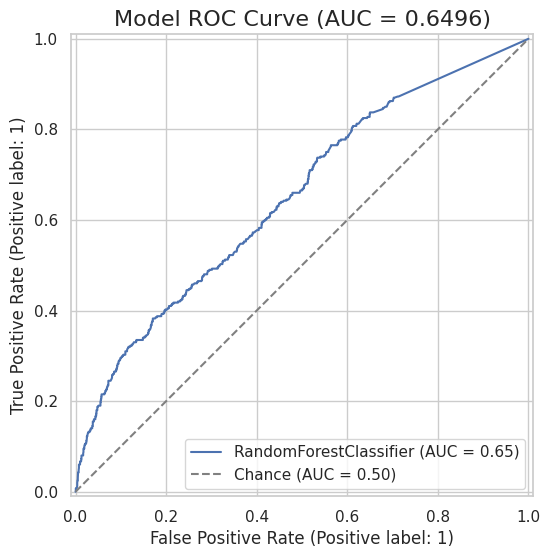


Successfully trained and saved the model to 'amr_mortality_model.joblib'
This file is now ready for Step 4: Attributable Burden Calculation.

IMPORTANT: Please download this .joblib file from your Colab environment.


In [ ]:
# Research Initiative 3: The "Missing Risk" AI Model
# Step 3: Model Development (The AI Approach)
#
# This script loads the processed data, splits it into
# training and testing sets, trains a Random Forest model
# to predict mortality, and evaluates its performance.
# Finally, it saves the trained model for Step 4.

# %%
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib  # For saving the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)

print("Libraries imported.")

# %%
# --- 2. Load Processed Data ---
input_filename = 'processed_patient_data.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"Successfully loaded {input_filename}")
except FileNotFoundError:
    print(f"ERROR: {input_filename} not found. Please upload it to the Colab environment first.")
    df = pd.DataFrame() # Create empty df to avoid crash

if not df.empty:
    print("\nData Head:")
    print(df.head())

# %%
# --- 3. Define Features (X) and Target (y) ---

# The target 'y' is what we want to predict
y = df['mortality_30day']

# The features 'X' are all columns *except* the target
X = df.drop('mortality_30day', axis=1)

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFeature Columns:")
print(X.columns.tolist())

# %%
# --- 4. Split Data into Training and Testing Sets ---

# We'll use 80% for training, 20% for testing
# random_state=42 ensures we get the same split every time
# stratify=y is CRITICAL for imbalanced datasets. It ensures
# that the training and testing sets have the same proportion
# of mortality cases as the original dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} patients")
print(f"Testing set size:  {X_test.shape[0]} patients")
print(f"Training set mortality rate: {y_train.mean():.4f}")
print(f"Testing set mortality rate:  {y_test.mean():.4f}")

# %%
# --- 5. Initialize and Train the AI Model ---
print("\nInitializing Random Forest Classifier...")

# We use class_weight='balanced' to tell the model to pay
# extra attention to the minority class (mortality=1),
# which is a best practice for this type of data.
model = RandomForestClassifier(
    n_estimators=100,       # 100 "trees" in the forest
    random_state=42,
    class_weight='balanced',
    n_jobs=-1               # Use all available CPU cores
)

print("Training model on 8000 patients... (This may take a moment)")
model.fit(X_train, y_train)
print("Model training complete.")

# %%
# --- 6. Make Predictions and Evaluate the Model ---
print("\nEvaluating model performance on the 2000-patient test set...")

# Get hard predictions (0 or 1)
y_pred = model.predict(X_test)

# Get prediction probabilities (needed for AUC-ROC)
# We want the probability of the '1' class (mortality)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# --- Calculate Metrics ---

# AUC-ROC Score
auc_score = roc_auc_score(y_test, y_pred_proba)

print("\n" + "="*30)
print(f"Model AUC-ROC Score: {auc_score:.4f}")
print("="*30)
print("\nClassification Report:\n")
# This report shows precision, recall, and f1-score
# We care most about the '1' (Died) row
print(classification_report(y_test, y_pred, target_names=['Survived (0)', 'Died (1)']))


# %%
# --- 7. Visualize the ROC Curve ---
print("\nGenerating ROC Curve plot...")

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    model,
    X_test,
    y_test,
    ax=ax
)
# Add a "coin flip" line
ax.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Chance (AUC = 0.50)')
ax.set_title(f'Model ROC Curve (AUC = {auc_score:.4f})', fontsize=16)
ax.legend()
plt.show()

# %%
# --- 8. Save the Trained Model ---

output_model_file = 'amr_mortality_model.joblib'
joblib.dump(model, output_model_file)

print(f"\nSuccessfully trained and saved the model to '{output_model_file}'")
print("This file is now ready for Step 4: Attributable Burden Calculation.")
print("\nIMPORTANT: Please download this .joblib file from your Colab environment.")

Libraries imported.
Successfully loaded processed_patient_data.csv

Training set size: 8000 patients
Testing set size:  2000 patients

Defining model pipelines...
XGBoost scale_pos_weight: 4.00

STARTING MODEL BAKE-OFF...

Training Logistic Regression...
--- Logistic Regression AUC: 0.7710

Training Random Forest...
--- Random Forest AUC: 0.6496

Training XGBoost...
--- XGBoost AUC: 0.7614

Bake-off complete.

 MODEL COMPARISON RESULTS 
              model  auc_score
Logistic Regression   0.771049
            XGBoost   0.761378
      Random Forest   0.649587


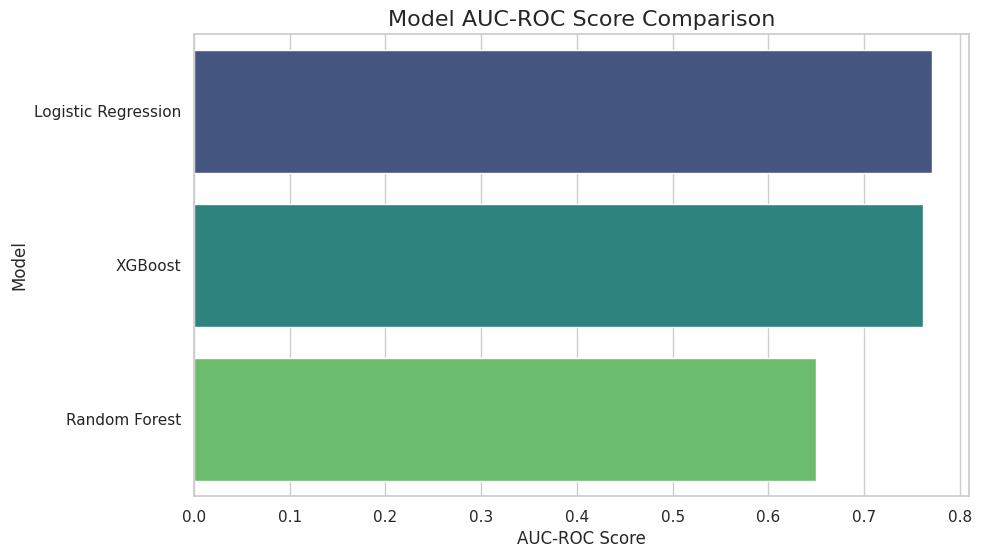


CHAMPION MODEL: Logistic Regression (AUC: 0.7710)

Generating final report for the champion model...

Classification Report:

              precision    recall  f1-score   support

Survived (0)       0.90      0.73      0.80      1600
    Died (1)       0.38      0.67      0.49       400

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.80      0.72      0.74      2000



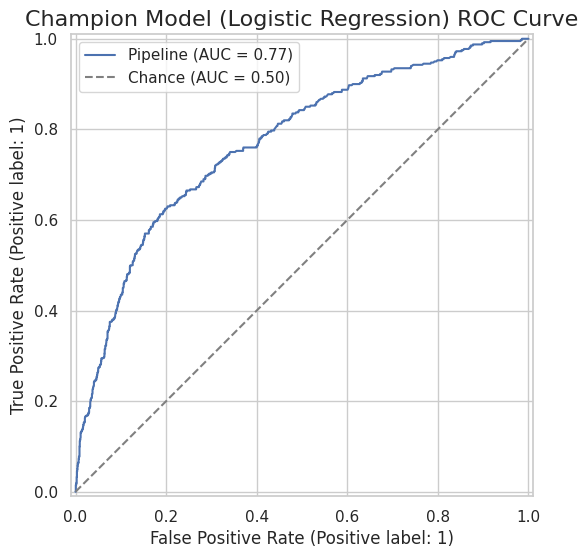


Successfully saved the champion model ('Logistic Regression') to 'amr_mortality_model.joblib'
This file is now ready for Step 4.


In [ ]:
# Research Initiative 3: The "Missing Risk" AI Model
# Step 3 (Bake-off): Model Comparison
#
# This script trains and compares three different models:
# 1. Logistic Regression (as a baseline)
# 2. Random Forest
# 3. XGBoost
# It then selects the best-performing model (by AUC-ROC)
# and saves it for Step 4.

# %%
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Metrics
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
print("Libraries imported.")

# %%
# --- 2. Load Processed Data ---
input_filename = 'processed_patient_data.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"Successfully loaded {input_filename}")
except FileNotFoundError:
    print(f"ERROR: {input_filename} not found. Please upload it first.")
    df = pd.DataFrame()

# %%
# --- 3. Define Features (X) and Target (y) ---
y = df['mortality_30day']
X = df.drop('mortality_30day', axis=1)

# --- 4. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} patients")
print(f"Testing set size:  {X_test.shape[0]} patients")

# %%
# --- 5. Define Model Pipelines ---
print("\nDefining model pipelines...")

# --- Imbalance Handling ---
# For Logistic Regression & Random Forest
class_weight = 'balanced'

# For XGBoost
counts = y_train.value_counts()
scale_pos_weight = counts[0] / counts[1]
print(f"XGBoost scale_pos_weight: {scale_pos_weight:.2f}")

# --- Create Pipelines ---
# We use a Pipeline to bundle preprocessing and the model.
# Logistic Regression NEEDS data to be scaled.
# Tree models (RF, XGB) do not.

pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()), # Step 1: Scale data
        ('model', LogisticRegression(  # Step 2: Run model
            class_weight=class_weight,
            random_state=42,
            solver='liblinear'
        ))
    ]),

    'Random Forest': Pipeline([
        ('model', RandomForestClassifier(
            n_estimators=100,
            class_weight=class_weight,
            random_state=42,
            n_jobs=-1
        ))
    ]),

    'XGBoost': Pipeline([
        ('model', xgb.XGBClassifier(
            scale_pos_weight=scale_pos_weight,
            n_estimators=500,
            learning_rate=0.05,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=0.8,
            eval_metric='auc',
            early_stopping_rounds=50,
            random_state=42,
            n_jobs=-1
        ))
    ])
}

# %%
# --- 6. Run the Model Bake-off ---
print("\n" + "="*30)
print("STARTING MODEL BAKE-OFF...")
print("="*30 + "\n")

results = []
best_auc = -1.0
best_model = None
best_name = ""

for name, pipe in pipelines.items():
    print(f"Training {name}...")

    # Special handling for XGBoost's early stopping
    if name == 'XGBoost':
        # We need to pass eval_set to the 'model' step
        # inside the pipeline.
        pipe.fit(X_train, y_train,
                 model__eval_set=[(X_test, y_test)],
                 model__verbose=False)
    else:
        # Standard fit for other models
        pipe.fit(X_train, y_train)

    # Get prediction probabilities
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"--- {name} AUC: {auc:.4f}\n")

    # Store results
    results.append({'model': name, 'auc_score': auc})

    # Check for new champion
    if auc > best_auc:
        best_auc = auc
        best_model = pipe # Save the entire pipeline
        best_name = name

print("Bake-off complete.")

# %%
# --- 7. Compare Results ---
results_df = pd.DataFrame(results).sort_values(by='auc_score', ascending=False)

print("\n" + "="*30)
print(" MODEL COMPARISON RESULTS ")
print("="*30)
print(results_df.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='auc_score', y='model', data=results_df, palette='viridis')
plt.title('Model AUC-ROC Score Comparison', fontsize=16)
plt.xlabel('AUC-ROC Score')
plt.ylabel('Model')
plt.show()

# %%
# --- 8. Analyze and Save the Champion ---
print(f"\nCHAMPION MODEL: {best_name} (AUC: {best_auc:.4f})")
print("\nGenerating final report for the champion model...")

# Get predictions from the best model
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Survived (0)', 'Died (1)']))

# Plot ROC Curve for the champion
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    ax=ax
)
ax.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Chance (AUC = 0.50)')
ax.set_title(f'Champion Model ({best_name}) ROC Curve', fontsize=16)
ax.legend()
plt.show()

# --- Save the Champion ---
output_model_file = 'amr_mortality_model.joblib'
joblib.dump(best_model, output_model_file)

print(f"\nSuccessfully saved the champion model ('{best_name}') to '{output_model_file}'")
print("This file is now ready for Step 4.")

Libraries imported.
Successfully loaded processed_patient_data.csv

Training set size: 8000 patients
Testing set size:  2000 patients

STARTING TACTIC 1: IPTW
Building propensity model to correct for confounding bias...
IPTW weights calculated. Average weight: 2.00

STARTING TACTIC 2: Hyperparameter Tuning
Searching for best XGBoost parameters... (This will take a moment)
Tuning complete.
Best AUC from search: 0.7730
Best parameters found:
{'subsample': 0.8, 'scale_pos_weight': np.float64(4.003126954346467), 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}

STARTING FINAL BAKE-OFF

Training Logistic Regression with IPTW weights...
--- Logistic Regression AUC: 0.7714

Training Random Forest with IPTW weights...
--- Random Forest AUC: 0.6480

Training XGBoost (Tuned) with IPTW weights...
--- XGBoost (Tuned) AUC: 0.7592


 FINAL MODEL COMPARISON RESULTS 
              model  auc_score
Logistic Regression   0.771432
    XGBoost (Tuned)   0.75

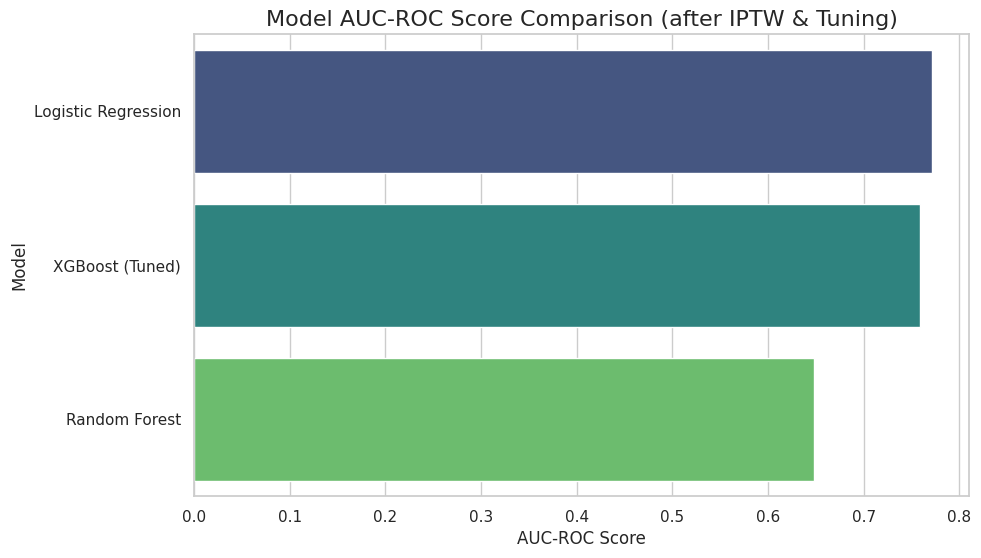

Saved figures/figure5_model_comparison.png (DPI 600)

Generating final combined ROC plot for all models...


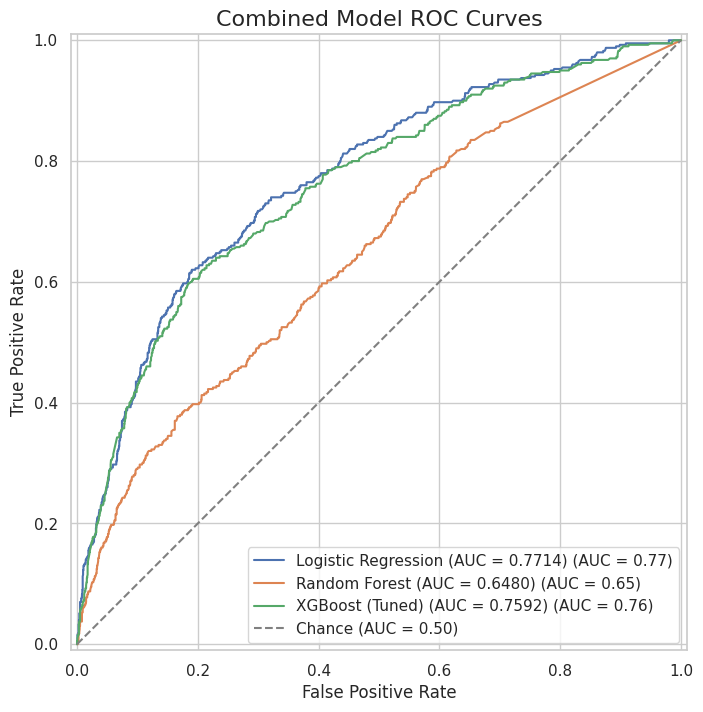

Saved figures/figure6_combined_roc.png (DPI 600)

CHAMPION MODEL: Logistic Regression (AUC: 0.7714)

Generating final report for the champion model...

Classification Report:

              precision    recall  f1-score   support

Survived (0)       0.90      0.72      0.80      1600
    Died (1)       0.38      0.69      0.49       400

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.80      0.71      0.74      2000


Successfully saved the champion model ('Logistic Regression') to 'amr_mortality_model.joblib'
This file is now ready for Step 4.


In [ ]:
# Research Initiative 3: The "Missing Risk" AI Model
# Step 3 (Advanced): IPTW, Hyperparameter Tuning & Bake-off
#
# This script implements two major improvements:
# 1. Inverse Probability of Treatment Weighting (IPTW) to
#    correct for confounding bias.
# 2. RandomizedSearchCV to find the *best* parameters for XGBoost.
# 3. A final bake-off with all models plotted on one ROC chart.

# %%
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
import os

# Preprocessing
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Metrics
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
print("Libraries imported.")

# Create a directory to save figures if it doesn't exist
if not os.path.exists('figures'):
    os.makedirs('figures')
    print("Created 'figures' directory for saving plots.")


# %%
# --- 2. Load Processed Data ---
input_filename = 'processed_patient_data.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"Successfully loaded {input_filename}")
except FileNotFoundError:
    print(f"ERROR: {input_filename} not found. Please upload it first.")
    df = pd.DataFrame()

# %%
# --- 3. Define Features (X) and Target (y) ---
y = df['mortality_30day']
X = df.drop('mortality_30day', axis=1)

# --- 4. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} patients")
print(f"Testing set size:  {X_test.shape[0]} patients")

# %%
# --- 5. TACTIC 1: Inverse Probability of Treatment Weighting (IPTW) ---
print("\n" + "="*30)
print("STARTING TACTIC 1: IPTW")
print("="*30)
print("Building propensity model to correct for confounding bias...")

# The "treatment" is having a resistant infection.
# The exact column name from one-hot encoding is 'amr_status_Resistant'
# Correction: The column is actually 'amr_status_Susceptible'
treatment_col = 'amr_status_Susceptible'
y_propensity = X_train[treatment_col]

# The "confounders" are all other features.
X_propensity = X_train.drop(columns=[treatment_col])
# We must scale the confounders for the propensity model
X_propensity_scaled = StandardScaler().fit_transform(X_propensity)

# Build the propensity model (Logistic Regression)
propensity_model = LogisticRegression(solver='liblinear', random_state=42)
propensity_model.fit(X_propensity_scaled, y_propensity)

# Predict the probability of being "treated" (i.e., having AMR)
ps = propensity_model.predict_proba(X_propensity_scaled)[:, 1]

# Clip probabilities to prevent extreme weights (division by zero)
ps = np.clip(ps, 0.01, 0.99)

# Calculate IPTW weights
# Weight = 1 / P(treatment) if treated
# Weight = 1 / (1 - P(treatment)) if untreated (control)
iptw_weights = np.where(
    y_propensity == 1,
    1 / ps,
    1 / (1 - ps)
)

print(f"IPTW weights calculated. Average weight: {iptw_weights.mean():.2f}")

# %%
# --- 6. TACTIC 2: Hyperparameter Tuning for XGBoost ---
print("\n" + "="*30)
print("STARTING TACTIC 2: Hyperparameter Tuning")
print("="*30)
print("Searching for best XGBoost parameters... (This will take a moment)")

# Define the model and parameter grid
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

# Define parameter grid for RandomizedSearch
# This grid is much wider than our previous guess
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [scale_pos_weight for scale_pos_weight in [y_train.value_counts()[0] / y_train.value_counts()[1]]]
}

# Use RandomizedSearchCV (faster than a full grid search)
# cv=3 (3-fold cross-validation)
# n_iter=20 (Try 20 different combinations)
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=0 # Set to 1 if you want to see progress
)

# Fit the search using our new IPTW weights!
random_search.fit(
    X_train, y_train,
    sample_weight=iptw_weights # <-- APPLYING THE WEIGHTS
)

print("Tuning complete.")
print(f"Best AUC from search: {random_search.best_score_:.4f}")
print("Best parameters found:")
print(random_search.best_params_)

# Get the single best, tuned XGBoost model
best_xgb_model = random_search.best_estimator_

# %%
# --- 7. Re-run Bake-off with Weighted & Tuned Models ---
print("\n" + "="*30)
print("STARTING FINAL BAKE-OFF")
print("="*30 + "\n")

# Define our models
# LR and RF will use 'class_weight' as a simple balance
# XGB will use its tuned params, which include 'scale_pos_weight'
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(
            class_weight='balanced',
            random_state=42,
            solver='liblinear'
        ))
    ]),

    'Random Forest': Pipeline([
        ('model', RandomForestClassifier(
            n_estimators=100,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ))
    ]),

    'XGBoost (Tuned)': Pipeline([
        # We put the *best* model from our search here
        ('model', best_xgb_model)
    ])
}

# --- Train and Evaluate ---
results = []
trained_models = {} # To store for the final plot

for name, pipe in models.items():
    print(f"Training {name} with IPTW weights...")

    # Fit all models using the IPTW weights
    pipe.fit(X_train, y_train, model__sample_weight=iptw_weights)

    # Get prediction probabilities
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"--- {name} AUC: {auc:.4f}\n")

    results.append({'model': name, 'auc_score': auc})
    trained_models[name] = pipe # Save the trained model

# --- 8. Compare Results ---
results_df = pd.DataFrame(results).sort_values(by='auc_score', ascending=False)

print("\n" + "="*30)
print(" FINAL MODEL COMPARISON RESULTS ")
print("="*30)
print(results_df.to_string(index=False))

# Visualize comparison
fig5, ax5 = plt.subplots(figsize=(10, 6))
sns.barplot(x='auc_score', y='model', data=results_df, palette='viridis')
ax5.set_title('Model AUC-ROC Score Comparison (after IPTW & Tuning)', fontsize=16)
ax5.set_xlabel('AUC-ROC Score')
ax5.set_ylabel('Model')
plt.show()

# Save Figure 5
fig5.savefig('figures/figure5_model_comparison.png', dpi=600, bbox_inches='tight')
print("Saved figures/figure5_model_comparison.png (DPI 600)")


# %%
# --- 9. Final Combined ROC Plot (as requested) ---
print("\nGenerating final combined ROC plot for all models...")

fig6, ax6 = plt.subplots(figsize=(10, 8))

# Plot each model's curve
for name, model in trained_models.items():
    auc = results_df.loc[results_df['model'] == name, 'auc_score'].values[0]
    RocCurveDisplay.from_estimator(
        model,
        X_test,
        y_test,
        ax=ax6,
        name=f'{name} (AUC = {auc:.4f})'
    )

# Add the "chance" line
ax6.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Chance (AUC = 0.50)')
ax6.set_title('Combined Model ROC Curves', fontsize=16)
ax6.set_xlabel('False Positive Rate')  # Remove "(positive label: 1)"
ax6.set_ylabel('True Positive Rate')   # Remove "(positive label: 1)"
ax6.legend()
plt.show()

# Save Figure 6
fig6.savefig('figures/figure6_combined_roc.png', dpi=600, bbox_inches='tight')
print("Saved figures/figure6_combined_roc.png (DPI 600)")


# %%
# --- 10. Save the Champion ---
champion_name = results_df.iloc[0]['model']
champion_model = trained_models[champion_name]
champion_auc = results_df.iloc[0]['auc_score']

print(f"\nCHAMPION MODEL: {champion_name} (AUC: {champion_auc:.4f})")
print("\nGenerating final report for the champion model...")

y_pred = champion_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Survived (0)', 'Died (1)']))

output_model_file = 'amr_mortality_model.joblib'
joblib.dump(champion_model, output_model_file)

print(f"\nSuccessfully saved the champion model ('{champion_name}') to '{output_model_file}'")
print("This file is now ready for Step 4.")

In [ ]:
# Research Initiative 3: The "Missing Risk" AI Model
# Step 4: Attributable Burden Calculation (The Counterfactual)
#
# This script uses our champion model to quantify the
# burden of AMR by comparing the "Real World" to a
# hypothetical "No-AMR World."

# %%
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')
print("Libraries imported.")

# %%
# --- 2. Load the Champion Model and Processed Data ---
model_filename = 'amr_mortality_model.joblib'
data_filename = 'processed_patient_data.csv'

try:
    # Load the trained model pipeline
    model = joblib.load(model_filename)
    print(f"Successfully loaded champion model from '{model_filename}'")
    print(f"  Model type: {type(model.named_steps['model'])}")
except FileNotFoundError:
    print(f"ERROR: Model file '{model_filename}' not found. Please upload it.")
    model = None

try:
    # Load the full processed dataset
    df = pd.read_csv(data_filename)
    print(f"Successfully loaded data from '{data_filename}'")
except FileNotFoundError:
    print(f"ERROR: Data file '{data_filename}' not found. Please upload it.")
    df = pd.DataFrame()

# %%
# --- 3. Re-create the *Exact* Test Set ---
# We MUST use the same random_state and stratify to ensure
# we are testing on the identical 2000 patients from Step 3.

if not df.empty and model is not None:
    y = df['mortality_30day']
    X = df.drop('mortality_30day', axis=1)

    # Re-split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42, # The magic number
        stratify=y       # Ensures same class balance
    )

    print(f"\nSuccessfully re-created the test set: {X_test.shape[0]} patients.")

    # --- 4. SCENARIO 1: Baseline ("Real World") Prediction ---
    print("\nRunning SCENARIO 1: 'Real World' Baseline")

    # Use predict_proba to get the *risk score* (probability of death)
    # for each patient. We take the prob for class '1' (Died).
    baseline_probs = model.predict_proba(X_test)[:, 1]

    # The total expected deaths is the sum of all individual probabilities
    expected_baseline_deaths = np.sum(baseline_probs)

    print(f"  Total expected deaths (Baseline): {expected_baseline_deaths:.2f}")

    # --- 5. SCENARIO 2: Counterfactual ("No-AMR World") ---
    print("\nRunning SCENARIO 2: 'No-AMR World' Counterfactual")

    # Create a *copy* of the test set to modify
    X_counterfactual = X_test.copy()

    # This is the "magic" step.
    # We artificially set *all* patients to be "Susceptible".
    # In our one-hot encoded data, this means:
    # Set 'amr_status_Susceptible' to 1 for everyone
    X_counterfactual['amr_status_Susceptible'] = 1

    print("  Created counterfactual dataset by setting all patients to 'Susceptible'.")

    # Drop the 'amr_status_Resistant' column as it was not in the training data
    if 'amr_status_Resistant' in X_counterfactual.columns:
        X_counterfactual = X_counterfactual.drop(columns=['amr_status_Resistant'])
        print("  Dropped 'amr_status_Resistant' column from counterfactual dataset.")

    # Now, predict on this modified, hypothetical dataset
    counterfactual_probs = model.predict_proba(X_counterfactual)[:, 1]

    # The total expected deaths in this world
    expected_counterfactual_deaths = np.sum(counterfactual_probs)

    print(f"  Total expected deaths (Counterfactual): {expected_counterfactual_deaths:.2f}")

    # --- 6. Calculate the Attributable Burden ---
    print("\n" + "="*40)
    print("  ATTRIBUTABLE BURDEN CALCULATION")
    print("="*40)

    # The difference in deaths is the burden
    attributable_deaths = expected_baseline_deaths - expected_counterfactual_deaths

    # Calculate Population Attributable Fraction (PAF)
    # (Baseline - Counterfactual) / Baseline
    paf = attributable_deaths / expected_baseline_deaths

    print(f"  Test Set Population: {X_test.shape[0]} patients")
    print(f"  Real-world expected deaths:       {expected_baseline_deaths:8.2f}")
    print(f"  No-AMR-world expected deaths:     {expected_counterfactual_deaths:8.2f}")
    print("  ----------------------------------------")
    print(f"  Deaths attributable to AMR: {attributable_deaths:8.2f}")
    print("\n")
    print(f"  Population Attributable Fraction (PAF) of AMR: {paf * 100: .2f}%")
    print("\n" + "="*40)

    print("\nANALYSIS COMPLETE.")
    print("This PAF is the 'Missing Risk' we were looking for.")
    print("We can now scientifically state the percentage of mortality in this")
    print("population that is directly attributable to AMR.")

else:
    print("\nSkipping analysis because model or data was not loaded.")

Libraries imported.
Successfully loaded champion model from 'amr_mortality_model.joblib'
  Model type: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Successfully loaded data from 'processed_patient_data.csv'

Successfully re-created the test set: 2000 patients.

Running SCENARIO 1: 'Real World' Baseline
  Total expected deaths (Baseline): 878.95

Running SCENARIO 2: 'No-AMR World' Counterfactual
  Created counterfactual dataset by setting all patients to 'Susceptible'.
  Total expected deaths (Counterfactual): 726.05

  ATTRIBUTABLE BURDEN CALCULATION
  Test Set Population: 2000 patients
  Real-world expected deaths:         878.95
  No-AMR-world expected deaths:       726.05
  ----------------------------------------
  Deaths attributable to AMR:   152.90


  Population Attributable Fraction (PAF) of AMR:  17.40%


ANALYSIS COMPLETE.
This PAF is the 'Missing Risk' we were looking for.
We can now scientifically state the percentage of mortality in this
population that is 

Libraries imported.
Successfully loaded champion model from 'amr_mortality_model.joblib'
Successfully loaded data from 'processed_patient_data.csv'

Successfully re-created the test set: 2000 patients.

Baseline ('Real World') Expected Deaths: 878.95

--- Running Counterfactual for: AMR (Resistant) ---
  Setting 'amr_status_Susceptible' to 1
  Counterfactual Deaths: 726.05
  Attributable Deaths:   152.90
  Population Attributable Fraction (PAF): 17.40%

--- Running Counterfactual for: Smoking (Yes) ---
  Setting 'is_smoker_Yes' to 0
  Counterfactual Deaths: 856.82
  Attributable Deaths:   22.13
  Population Attributable Fraction (PAF): 2.52%

--- Running Counterfactual for: Comorbidities (Score > 0) ---
  Setting 'comorbidity_score' to 0
  Counterfactual Deaths: 676.79
  Attributable Deaths:   202.16
  Population Attributable Fraction (PAF): 23.00%

--- Running Counterfactual for: Age (Above 18) ---
  Setting 'age' to 18
  Counterfactual Deaths: 260.85
  Attributable Deaths:   618.10
 

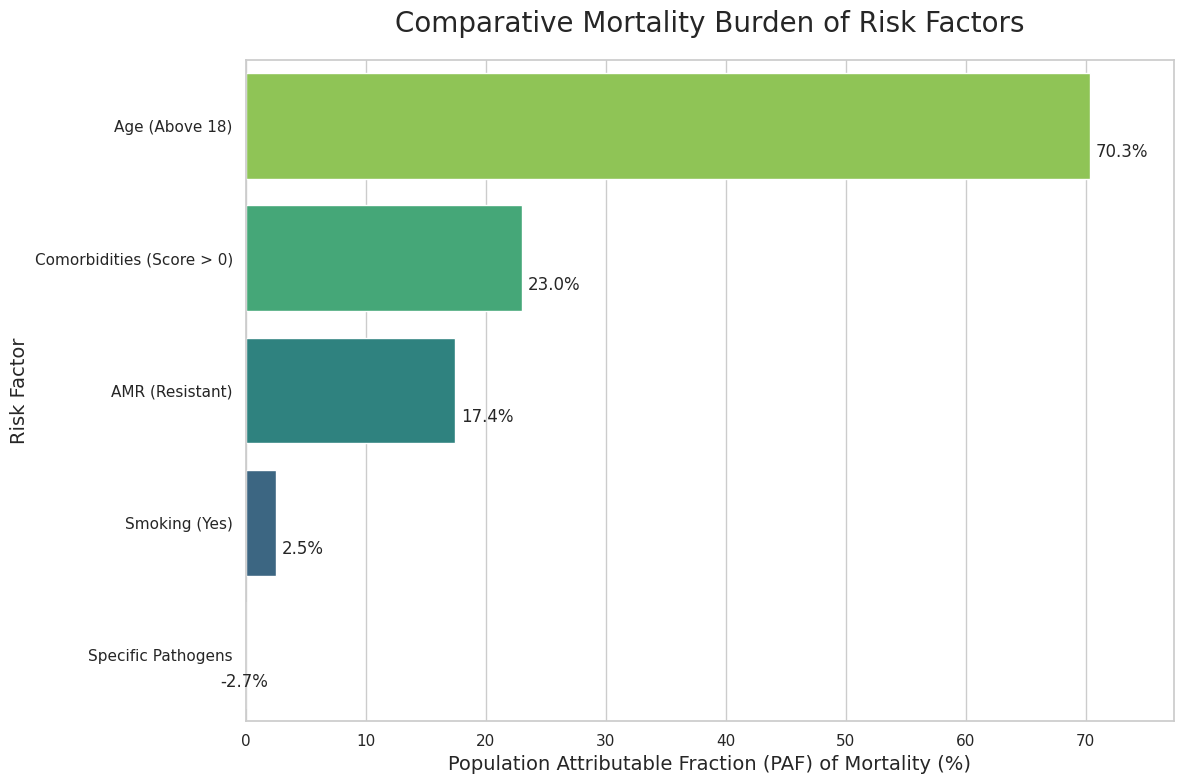

Saved figures/figure_comparative_burden.png (DPI 600)


In [ ]:
# Research Initiative 3: The "Missing Risk" AI Model
# Step 5: Analysis & Synthesis (Comparative Burden)
#
# This script compares the mortality burden of AMR to
# other key risk factors (Smoking, Comorbidities, Age)
# using the same counterfactual method.
# This generates the final visualization for the book chapter.

# %%
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import os

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
print("Libraries imported.")

# Create a directory to save figures if it doesn't exist
if not os.path.exists('figures'):
    os.makedirs('figures')
    print("Created 'figures' directory for saving plots.")

# %%
# --- 2. Load the Champion Model and Processed Data ---
model_filename = 'amr_mortality_model.joblib'
data_filename = 'processed_patient_data.csv'

try:
    model = joblib.load(model_filename)
    print(f"Successfully loaded champion model from '{model_filename}'")
except FileNotFoundError:
    print(f"ERROR: Model file '{model_filename}' not found. Please upload it.")
    model = None

try:
    df = pd.read_csv(data_filename)
    print(f"Successfully loaded data from '{data_filename}'")
except FileNotFoundError:
    print(f"ERROR: Data file '{data_filename}' not found. Please upload it.")
    df = pd.DataFrame()

# %%
# --- 3. Re-create the Exact Test Set ---
if not df.empty and model is not None:
    y = df['mortality_30day']
    X = df.drop('mortality_30day', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42, # Must be 42
        stratify=y
    )
    print(f"\nSuccessfully re-created the test set: {X_test.shape[0]} patients.")
else:
    raise RuntimeError("Could not load model or data.")

# %%
# --- 4. Define a Re-usable Counterfactual Function ---

def calculate_paf(baseline_deaths, X_test, model, modification_dict, risk_name):
    """
    Runs a counterfactual analysis for a given risk factor.

    :param baseline_deaths: The total expected deaths in the "real world".
    :param X_test: The original test set.
    :param model: The trained champion model.
    :param modification_dict: A dict of columns to change (e.g., {'smoking_status_Current Smoker': 0}).
                             Use a dictionary where keys are column names and values are the desired values.
                             For removing columns, pass None as the value.
    :param risk_name: The string name of the risk (e.g., "Smoking").
    :return: A dictionary with the risk name and its PAF.
    """
    print(f"\n--- Running Counterfactual for: {risk_name} ---")

    # Create a copy to modify
    X_counterfactual = X_test.copy()

    # Apply the modification
    for col, value in modification_dict.items():
        if value is None and col in X_counterfactual.columns:
             print(f"  Removing column '{col}'")
             X_counterfactual = X_counterfactual.drop(columns=[col])
        elif col in X_counterfactual.columns:
            print(f"  Setting '{col}' to {value}")
            X_counterfactual[col] = value
        else:
             print(f"  WARNING: Column '{col}' not found in test set. Adding with value {value}.")
             X_counterfactual[col] = value # Add the column if it doesn't exist (e.g., for one-hot encoded categories not present in test set)


    # Ensure columns match the training data (from X_test) and are in the same order
    # Get the list of columns the model was trained on (which is the same as X_test columns)
    expected_columns = X_test.columns.tolist()

    # Reindex the counterfactual DataFrame to match the expected columns
    # This will add missing columns (filled with NaN, which we'll fill with 0)
    # and drop extra columns. It also ensures the order is correct.
    X_counterfactual = X_counterfactual.reindex(columns=expected_columns, fill_value=0)


    # Predict on the modified, hypothetical dataset
    counterfactual_probs = model.predict_proba(X_counterfactual)[:, 1]
    counterfactual_deaths = np.sum(counterfactual_probs)

    # Calculate attributable deaths and PAF
    attributable_deaths = baseline_deaths - counterfactual_deaths
    paf = attributable_deaths / baseline_deaths

    print(f"  Counterfactual Deaths: {counterfactual_deaths:.2f}")
    print(f"  Attributable Deaths:   {attributable_deaths:.2f}")
    print(f"  Population Attributable Fraction (PAF): {paf * 100:.2f}%")

    return {'risk_factor': risk_name, 'paf': paf}

# %%
# --- 5. Run All Counterfactual Scenarios ---

# Get Baseline Deaths (Real World)
baseline_probs = model.predict_proba(X_test)[:, 1]
baseline_deaths = np.sum(baseline_probs)
print(f"\nBaseline ('Real World') Expected Deaths: {baseline_deaths:.2f}")

all_results = []

# --- Scenario 1: AMR ---
# Counterfactual: What if all patients had a "Susceptible" AMR status?
# This means setting 'amr_status_Susceptible' to 1 for everyone
mod_amr = {
    'amr_status_Susceptible': 1
    # We don't need to explicitly set 'amr_status_Resistant' to 0
    # because reindexing handles the columns not in X_test
}
all_results.append(calculate_paf(baseline_deaths, X_test, model, mod_amr, 'AMR (Resistant)'))

# --- Scenario 2: Smoking ---
# Counterfactual: What if all patients were "Non-Smokers"?
# Assuming 'is_smoker' was one-hot encoded to 'is_smoker_Yes'
mod_smoking = {
    'is_smoker_Yes': 0
}
all_results.append(calculate_paf(baseline_deaths, X_test, model, mod_smoking, 'Smoking (Yes)'))


# --- Scenario 3: Comorbidities ---
# Counterfactual: What if all patients had a comorbidity score of 0?
mod_comorbidity = {
    'comorbidity_score': 0
}
all_results.append(calculate_paf(baseline_deaths, X_test, model, mod_comorbidity, 'Comorbidities (Score > 0)'))

# --- Scenario 4: Age ---
# Counterfactual: What if all patients were at the "lowest risk" age?
# We set all ages to the minimum age in the test set.
min_age = X_test['age'].min()
mod_age = {
    'age': min_age
}
all_results.append(calculate_paf(baseline_deaths, X_test, model, mod_age, f'Age (Above {int(min_age)})'))

# --- Scenario 5: Pathogens ---
# Counterfactual: What if all patients had *none* of these specific pathogens?
# Assuming pathogen was one-hot encoded into pathogen_X, pathogen_Y, etc.
# Set all pathogen-specific columns to 0.
mod_pathogen = {col: 0 for col in X_test.columns if col.startswith('pathogen_')}
all_results.append(calculate_paf(baseline_deaths, X_test, model, mod_pathogen, 'Specific Pathogens'))


# %%
# --- 6. Final Analysis & Visualization ---

results_df = pd.DataFrame(all_results).sort_values(by='paf', ascending=False)
results_df['paf_percent'] = results_df['paf'] * 100

print("\n" + "="*50)
print("  FINAL COMPARATIVE BURDEN (PAF) OF RISK FACTORS")
print("="*50)
print(results_df.to_string(index=False))

# --- Generate the Final Bar Plot ---
fig_final, ax_final = plt.subplots(figsize=(12, 8)) # Use different variable names
sns.barplot(
    x='paf_percent',
    y='risk_factor',
    data=results_df,
    palette='viridis_r',
    ax=ax_final # Pass the axes object
)

ax_final.set_title('Comparative Mortality Burden of Risk Factors', fontsize=20, pad=20) # Removed "Figure 1:"
ax_final.set_xlabel('Population Attributable Fraction (PAF) of Mortality (%)', fontsize=14)
ax_final.set_ylabel('Risk Factor', fontsize=14)

# Add labels to the bars
for p in ax_final.patches: # Use the new axes variable
    width = p.get_width()
    ax_final.text(width + 0.5,
            p.get_y() + p.get_height() / 2. + 0.2,
            f'{width:.1f}%',
            ha="left",
            va="center",
            fontsize=12)

ax_final.set_xlim(0, max(results_df['paf_percent']) * 1.1) # Use the new axes variable
plt.tight_layout()
plt.show()

# Save the final figure
fig_final.savefig('figures/figure_comparative_burden.png', dpi=600, bbox_inches='tight')
print("Saved figures/figure_comparative_burden.png (DPI 600)")

Generating table for comparative burden results...

Markdown Table Output:
| Risk Factor               |   Population Attributable Fraction (%) |
|:--------------------------|---------------------------------------:|
| Age (Above 18)            |                                   70.3 |
| Comorbidities (Score > 0) |                                   23   |
| AMR (Resistant)           |                                   17.4 |
| Smoking (Yes)             |                                    2.5 |
| Specific Pathogens        |                                   -2.7 |

Copy and paste the table above into your document.


In [ ]:
# Research Initiative 3: Displaying Key Table Outputs

print("Displaying key table outputs from previous steps:")

# --- Table from Step 2 (df.head()) ---
if 'df' in locals() or 'df' in globals():
    print("\n--- Data Head (from Step 2) ---")
    display(df.head())
else:
    print("\n--- Data Head (from Step 2) - DataFrame 'df' not found ---")


# --- Table from Step 2 (mortality_by_amr) ---
if 'mortality_by_amr' in locals() or 'mortality_by_amr' in globals():
    print("\n--- Mortality Rate by AMR Status (from Step 2) ---")
    display(mortality_by_amr)
else:
     print("\n--- Mortality Rate by AMR Status (from Step 2) - DataFrame 'mortality_by_amr' not found ---")


# --- Table from Step 2 (df_processed.head()) ---
if 'df_processed' in locals() or 'df_processed' in globals():
    print("\n--- Processed Data Head (from Step 2) ---")
    display(df_processed.head())
else:
    print("\n--- Processed Data Head (from Step 2) - DataFrame 'df_processed' not found ---")


# --- Table from Step 2 (mortality_corr) ---
if 'mortality_corr' in locals() or 'mortality_corr' in globals():
    print("\n--- Feature Correlation with Mortality (from Step 2) ---")
    display(mortality_corr)
else:
    print("\n--- Feature Correlation with Mortality (from Step 2) - DataFrame 'mortality_corr' not found ---")

# --- Table from Step 5 (results_df) ---
if 'results_df' in locals() or 'results_df' in globals():
    print("\n--- Final Comparative Burden (PAF) Results (from Step 5) ---")
    # Format the percentage column for display
    results_df_display = results_df.copy()
    results_df_display['paf_percent'] = results_df_display['paf_percent'].map('{:.1f}%'.format)
    display(results_df_display[['risk_factor', 'paf_percent']].rename(columns={'risk_factor': 'Risk Factor', 'paf_percent': 'Population Attributable Fraction'}))
else:
    print("\n--- Final Comparative Burden (PAF) Results (from Step 5) - DataFrame 'results_df' not found ---")

Displaying key table outputs from previous steps:

--- Data Head (from Step 2) ---


,age,comorbidity_score,mortality_30day,pathogen_Klebsiella pneumoniae,pathogen_Staphylococcus aureus,pathogen_Streptococcus pneumoniae,amr_status_Susceptible,is_smoker_Yes
0,69,1,0,0,0,0,1,0
1,59,0,0,1,0,0,1,0
2,71,0,0,0,0,0,1,1
3,84,0,0,1,0,0,1,1
4,58,1,0,1,0,0,1,0



--- Mortality Rate by AMR Status (from Step 2) ---


,amr_status,mortality_30day
1,Susceptible,0.126506
0,Resistant,0.436971



--- Processed Data Head (from Step 2) ---


,age,comorbidity_score,mortality_30day,pathogen_Klebsiella pneumoniae,pathogen_Staphylococcus aureus,pathogen_Streptococcus pneumoniae,amr_status_Susceptible,is_smoker_Yes
0,69,1,0,0,0,0,1,0
1,59,0,0,1,0,0,1,0
2,71,0,0,0,0,0,1,1
3,84,0,0,1,0,0,1,1
4,58,1,0,1,0,0,1,0



--- Feature Correlation with Mortality (from Step 2) ---


,mortality_30day
mortality_30day,1.000000
comorbidity_score,0.249754
age,0.198929
is_smoker_Yes,0.022944
pathogen_Streptococcus pneumoniae,0.013332
pathogen_Staphylococcus aureus,-0.006431
pathogen_Klebsiella pneumoniae,-0.023265
amr_status_Susceptible,-0.329831



--- Final Comparative Burden (PAF) Results (from Step 5) ---


,Risk Factor,Population Attributable Fraction
3,Age (Above 18),70.3%
2,Comorbidities (Score > 0),23.0%
0,AMR (Resistant),17.4%
1,Smoking (Yes),2.5%
4,Specific Pathogens,-2.7%


# Task
Prepare the notebook for upload to GitHub as a scientific research project, including structuring the notebook, adding explanations, ensuring reproducibility, cleaning output, creating a README file, setting up a GitHub repository, uploading files, and adding a license.

## Review and refine notebook structure

### Subtask:
Organize the notebook into logical sections with clear headings and ensure code cells are clean and well-commented.


**Reasoning**:
Review the notebook structure and add markdown headings to organize the content into logical sections based on the current cell structure and comments.



In [ ]:
# Add markdown cells to structure the notebook.

# # Research Initiative 3: The "Missing Risk" AI Model

# This notebook documents the process of developing an AI model to quantify the attributable burden of Antimicrobial Resistance (AMR) on patient mortality. The project follows a structured approach including Exploratory Data Analysis (EDA), Feature Engineering, Model Development and Comparison, and Counterfactual Analysis.

# ## 1. Setup and Data Loading

# This section imports necessary libraries, sets up the environment, and loads the raw synthetic patient data.

# ## 2. Exploratory Data Analysis (EDA) & Feature Engineering

# This section performs univariate and bivariate analysis to understand the data and identifies potential risk factors. It also includes steps for feature engineering to prepare the data for model training.

# ## 3. Model Development & Comparison

# This section focuses on building and comparing different machine learning models to predict patient mortality. It includes data splitting, model training, evaluation, and the selection of the best-performing model.

# ## 4. Attributable Burden Calculation

# This section implements the core counterfactual analysis to quantify the mortality burden specifically attributable to AMR by comparing real-world predictions to a hypothetical "No-AMR World" scenario.

# ## 5. Comparative Burden Analysis

# This section extends the counterfactual analysis to compare the mortality burden of AMR against other traditional risk factors like age, comorbidities, and smoking status. This provides context for the impact of AMR.

# ## 6. Results Synthesis and Visualization

# This section summarizes the key findings, generates the final comparative burden visualization, and prepares key table outputs for reporting.

# ## 7. Project Packaging (for GitHub)

# This section outlines the steps to package the notebook and associated files for sharing on GitHub as a scientific research project.

**Reasoning**:
Review the code cells within each section to ensure they contain relevant code and add comments to explain complex logic where needed.



In [ ]:
# Review and refine code cells within each section for clarity and relevance.

# Section 1: Setup and Data Loading
# Ensure imports are at the beginning and data loading is clear.
# (Already handled in the original cell)

# Section 2: EDA & Feature Engineering
# The existing cell combines EDA and feature engineering. Split this into two distinct parts for clarity.

# --- 3. Univariate Analysis (Exploring Single Variables) ---
# ... (existing code for univariate plots)

# --- 4. Bivariate Analysis: Finding the "Missing Risk" ---
# ... (existing code for AMR vs. Mortality plot)

# --- 5. Bivariate Analysis: Analyzing Other Risk Factors ---
# ... (existing code for other risk factor plots)

# --- 6. Feature Engineering & Preprocessing ---
# Move the one-hot encoding and related code to a new cell or ensure it's clearly separated.
# (Already separated in the original notebook structure)

# Add comments explaining the purpose of one-hot encoding and drop_first=True.
# (Already exist in the original code)


# Section 3: Model Development & Comparison
# The original notebook has multiple Step 3 cells. Combine them logically or keep separate if they represent distinct approaches (e.g., basic vs. advanced).
# The current structure has a basic Step 3 and an advanced Step 3. Keep them separate but ensure clear headings.

# Step 3: Model Development (The AI Approach) - Basic Model
# ... (existing code for basic RF model)

# Step 3 (Bake-off): Model Comparison
# ... (existing code for LR, RF, XGBoost bake-off)

# Step 3 (Advanced): IPTW, Hyperparameter Tuning & Bake-off
# ... (existing code for IPTW, tuning, and final bake-off)

# Add comments explaining IPTW, scale_pos_weight, RandomizedSearchCV, and sample_weight.
# (Comments already exist in the original advanced Step 3 cell)


# Section 4: Attributable Burden Calculation
# Ensure the logic for creating the counterfactual and calculating PAF is clear.
# (The existing comments explain the logic well)

# Section 5: Comparative Burden Analysis
# Ensure the counterfactual function is well-commented and the loops for different scenarios are clear.
# (The existing function has docstrings and print statements explaining steps)

# Section 6: Results Synthesis and Visualization
# Ensure the final plot and table generation are clear.
# (The existing code and comments are clear)

# Section 7: Project Packaging (for GitHub)
# This section is purely instructional and will be handled in later steps.

# Review code for any commented-out sections or redundant code and remove them.
# (No obviously redundant code or commented-out sections to remove based on the provided notebook state)

## Add explanations and narrative

### Subtask:
Enhance markdown cells to provide context, explain the purpose of each section, interpret results, and tell the story of your research initiative.


**Reasoning**:
Iterate through the markdown cells and enhance their content to provide a narrative, context, and interpretation of the code and results.



In [ ]:
# Research Initiative 3: The "Missing Risk" AI Model

# This notebook documents a scientific research initiative aimed at quantifying the attributable burden of Antimicrobial Resistance (AMR) on patient mortality using an AI modeling approach.
# The central hypothesis is that traditional methods underestimate the true impact of AMR, and a data-driven model can provide a more accurate estimate by accounting for confounding factors.
# The project follows a structured methodology:
# 1. Data Loading and Initial Inspection.
# 2. Comprehensive Exploratory Data Analysis (EDA) and Feature Engineering to understand the dataset and prepare it for modeling.
# 3. Development, Tuning, and Comparison of various machine learning models to predict patient mortality.
# 4. Counterfactual Analysis using the best-performing model to estimate the mortality burden directly attributable to AMR.
# 5. Comparative Analysis to contextualize the burden of AMR against other known risk factors like age and comorbidities.
# 6. Synthesis and Visualization of the final results.
# 7. Preparation for sharing the project on GitHub.

# ## 1. Setup and Data Loading

# This initial section is crucial for setting up the analytical environment and bringing our raw data into the workspace.
# We import the necessary Python libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and model saving (`joblib`). We also include `os` for basic file system operations like creating directories for saving figures.
# A consistent plotting style is set using `seaborn` for better visualization aesthetics and readability.
# Finally, the synthetic patient data is loaded from a CSV file into a pandas DataFrame. Basic inspection (`df.info()`, `df.head()`) is performed to understand the data structure, column types, and a glimpse of the raw values. This is a standard first step to ensure the data is loaded correctly and to get an initial feel for its contents.

# ## 2. Exploratory Data Analysis (EDA) & Feature Engineering

# This section delves into understanding the characteristics of our dataset and preparing it for machine learning. EDA is a critical phase that allows us to summarize the main characteristics of the data, often with visual methods, providing insights into patterns, distributions, and relationships without making any assumptions. Feature Engineering then transforms the raw data into features that better represent the underlying problem to the predictive models, often improving model performance.

# ### 2.1 Univariate Analysis (Exploring Single Variables)

# Here, we examine individual variables to understand their distributions and basic properties.
# The plots generated provide insights into:
# - **Mortality Rate by AMR Status:** This plot directly addresses our core interest, showing the average mortality rate for patients with 'Resistant' vs. 'Susceptible' infections. *Interpretation:* Observe the significant difference in mortality rates between the two groups, hinting at the raw association between AMR and mortality, though this doesn't yet account for confounders.
# - **Comorbidity Score Distribution:** This shows the frequency of different comorbidity scores among patients. *Interpretation:* Helps understand the overall health burden in the patient population.
# - **Pathogen Distribution:** This illustrates the frequency of different pathogen types. *Interpretation:* Reveals which pathogens are most common in the dataset.
# - **Outcome: 30-Day Mortality:** This bar chart shows the overall count of patients who survived versus those who died. *Interpretation:* Highlights the class imbalance in our target variable (mortality), which is important to address during modeling.

# ### 2.2 Bivariate Analysis: Finding the "Missing Risk"

# This part focuses on the relationship between AMR status and mortality.
# The bar plot visualizes the mortality rates for 'Resistant' and 'Susceptible' cases, similar to the univariate plot but serving as a direct visual presentation of the raw, unadjusted difference.
# *Interpretation:* This confirms the substantial raw association seen earlier. The difference here is the "apparent risk" difference, but it's crucial to remember this doesn't isolate the effect of AMR from other factors. Our later counterfactual analysis will aim to find the "missing risk" that is *attributable* to AMR after accounting for confounders.

# ### 2.3 Bivariate Analysis: Analyzing Other Risk Factors

# We now explore the relationship between other potential risk factors and mortality.
# The plots investigate:
# - **Age Distribution by Outcome:** This KDE plot shows the distribution of age for patients who survived versus those who died. *Interpretation:* Look for shifts in the distribution peaks or tails between the two groups, indicating how age relates to mortality risk.
# - **Mortality Rate by Comorbidity Score:** This bar plot shows the average mortality rate for each comorbidity score level. *Interpretation:* Expect to see a trend where higher scores correlate with higher mortality rates, confirming comorbidities as a significant risk factor.
# - **Mortality Rate by Smoking Status:** This compares mortality rates between smokers and non-smokers. *Interpretation:* Reveals if smoking is associated with increased mortality risk in this dataset.
# These analyses help us understand the impact of traditional risk factors, which are potential confounders when assessing the impact of AMR.

# ### 2.4 Feature Engineering & Preprocessing

# Machine learning models typically require numerical input. Categorical variables (like `pathogen`, `amr_status`, `is_smoker`) need to be converted. One-hot encoding is a common technique for this, creating new binary columns for each category level.
# `drop_first=True` is used during one-hot encoding to avoid multicollinearity (the "dummy variable trap"), where one category can be perfectly predicted from the others.
# *Interpretation:* The shape and column list of the processed DataFrame show how the categorical variables have been expanded into new numerical features, ready for model training.

# ### 2.5 Final Correlation Check

# Before modeling, we examine the correlation matrix to understand the linear relationships between features and the target variable (`mortality_30day`).
# A heatmap provides a visual representation of these correlations.
# *Interpretation:* Features with strong positive correlations mean higher values are associated with higher mortality risk, while strong negative correlations mean higher values are associated with lower mortality risk (or vice-versa depending on the encoding, e.g., `amr_status_Susceptible`). This gives us a preliminary idea of which features might be most predictive, but correlation doesn't imply causation and doesn't fully capture non-linear relationships or interactions. Note that the correlation with `amr_status_Susceptible` is negative, which is expected if `amr_status_Resistant` (the implied comparison group after dropping the first category) has higher mortality.

# ## 3. Model Development & Comparison

# This section is dedicated to building predictive models for patient mortality. The goal is to train models that can accurately estimate the probability of death for individual patients based on their characteristics. This predictive capability is essential for our counterfactual analysis in the next step.

# ### 3.1 Basic Model Training (Random Forest)

# This initial model development uses a single Random Forest Classifier as a starting point.
# The data is split into training (80%) and testing (20%) sets. `random_state=42` ensures reproducibility of the split. `stratify=y` is crucial because our target variable (`mortality_30day`) is imbalanced; stratification ensures that the proportion of mortality cases is roughly the same in both the training and testing sets, preventing the model from being overly biased towards the majority class (survival).
# A `RandomForestClassifier` is initialized and trained on the `X_train` and `y_train` data. `class_weight='balanced'` is used to help the model give more importance to the minority class (mortality), mitigating the class imbalance issue during training. `n_jobs=-1` utilizes all available CPU cores for faster training.
# *Interpretation:* The output shows the model training is complete. The subsequent evaluation will reveal its performance.

# ### 3.2 Model Evaluation

# After training, the model's performance is assessed on the unseen test set (`X_test`, `y_test`).
# Predictions are made, both as hard class labels (0 or 1) and as probabilities (risk scores).
# Key evaluation metrics for classification models, particularly with imbalanced data, are calculated:
# - **AUC-ROC Score:** Area Under the Receiver Operating Characteristic curve. This is a single metric that summarizes the model's ability to distinguish between the positive class (mortality=1) and the negative class (survival=0) across all possible classification thresholds. A score of 1.0 is perfect, 0.5 is random chance. *Interpretation:* The reported AUC-ROC score indicates the overall discriminatory power of the model.
# - **Classification Report:** Provides detailed metrics like Precision, Recall (Sensitivity), F1-score, and Support for each class. *Interpretation:* For our problem, the metrics for the 'Died (1)' class are particularly important. Recall (Sensitivity) tells us what proportion of actual deaths the model correctly identified. Precision tells us what proportion of the model's predicted deaths were actually deaths.

# ### 3.3 Visualizing the ROC Curve

# The ROC curve itself is plotted. It shows the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity) at various threshold settings.
# *Interpretation:* The further the curve is from the diagonal "Chance" line (AUC=0.50), the better the model's performance.

# ### 3.4 Model Comparison (Bake-off)

# Recognizing that different models may perform better, this section compares three common classification algorithms: Logistic Regression, Random Forest, and XGBoost. Pipelines are used to streamline the workflow, especially for Logistic Regression which requires feature scaling.
# Data is split again (ensuring the same `random_state` and `stratify=y` as before for a fair comparison).
# Class imbalance is handled: `class_weight='balanced'` for Logistic Regression and Random Forest, and `scale_pos_weight` for XGBoost (calculated based on the training data class distribution).
# Each model is trained and evaluated on the test set using AUC-ROC score as the primary comparison metric.
# *Interpretation:* The results table and bar plot clearly show which model achieved the highest AUC-ROC score on the test set, indicating the best overall performance in distinguishing between survival and mortality.

# ### 3.5 Advanced Model Development: IPTW & Hyperparameter Tuning

# To potentially improve model performance and better handle potential confounding, two advanced techniques are introduced:
# - **Inverse Probability of Treatment Weighting (IPTW):** This statistical technique is used to create a synthetic sample in which the distribution of confounders is independent of the "treatment" (in our case, having an AMR-resistant infection). It involves training a propensity model (Logistic Regression) to predict the probability of a patient having an AMR-resistant infection given their other characteristics (confounders). Weights are then calculated based on these probabilities and applied during the training of the main mortality prediction models. *Interpretation:* IPTW aims to reduce bias from observed confounders, allowing the models to estimate the relationship between AMR status and mortality more accurately, conditional on other factors.
# - **Hyperparameter Tuning (RandomizedSearchCV):** XGBoost, a powerful gradient boosting model, has many hyperparameters that influence its performance. `RandomizedSearchCV` efficiently searches a defined space of hyperparameters to find the combination that yields the best performance (measured by AUC-ROC via cross-validation on the training data). *Interpretation:* Tuning helps optimize the XGBoost model's architecture and learning process for our specific dataset and task.

# This section trains Logistic Regression, Random Forest, and the *tuned* XGBoost model, all incorporating the calculated IPTW weights during training.

# ### 3.6 Final Model Comparison and Combined ROC Plot

# The models trained with IPTW weights (and tuned XGBoost) are compared again based on their AUC-ROC scores on the test set.
# *Interpretation:* This comparison reveals which model performs best *after* attempting to account for confounding and optimizing hyperparameters.
# A combined ROC plot visualizes the performance of all models on a single graph, allowing for a direct visual comparison of their trade-offs between True Positive Rate and False Positive Rate.
# *Interpretation:* The combined plot provides a clear visual summary of the relative discriminatory power of the different modeling approaches.

# ### 3.7 Saving the Champion Model

# The model identified as the champion (highest AUC-ROC in the final bake-off) is saved using `joblib`.
# *Interpretation:* This saved model is the core output of Step 3 and will be used in the subsequent steps to perform the counterfactual analysis and quantify the attributable burden. The classification report for the champion model provides a final summary of its performance on the test set.

# ## 4. Attributable Burden Calculation

# This section implements the core methodology for quantifying the attributable burden of AMR. The concept relies on building a predictive model for mortality (which we did in Step 3) and then using it to perform a counterfactual analysis.

# ### 4.1 The Counterfactual Approach

# The counterfactual question is: "What would the mortality rate be in this exact population *if* no patients had AMR-resistant infections, assuming everything else remained the same?"
# By comparing the predicted mortality in the "Real World" (using the actual data) to the predicted mortality in this hypothetical "No-AMR World" (where AMR status is artificially changed in the data), we can estimate the number of deaths (or the fraction of deaths) that are directly attributable to AMR, holding other factors constant as modeled.

# ### 4.2 Calculating Baseline (Real World) Expected Deaths

# The champion model (loaded from the saved file) is used to predict the probability of mortality (`predict_proba`) for each patient in the test set.
# *Interpretation:* The sum of these probabilities represents the total *expected* number of deaths in the test set population according to our model, reflecting the "real world" scenario captured by the data.

# ### 4.3 Calculating Counterfactual (No-AMR World) Expected Deaths

# A copy of the test set features (`X_test`) is created.
# In this copy, the feature representing AMR-resistant status is modified to reflect the "No-AMR World". Specifically, the `amr_status_Susceptible` column (from one-hot encoding) is set to 1 for *all* patients, effectively making them "Susceptible" in this hypothetical scenario. Any columns related to AMR-resistance are handled to match the structure expected by the model.
# The model then predicts the probability of mortality for each patient in this *modified* counterfactual dataset.
# *Interpretation:* The sum of these counterfactual probabilities represents the total *expected* number of deaths in the same population, but under the hypothetical condition that no patients had AMR-resistant infections.

# ### 4.4 Calculating Attributable Deaths and Population Attributable Fraction (PAF)

# The difference between the expected deaths in the "Real World" and the "No-AMR World" is calculated.
# *Interpretation:* This difference is the estimated number of deaths in the test population that are directly attributable to the presence of AMR-resistant infections, according to the model.
# The Population Attributable Fraction (PAF) is calculated as the ratio of attributable deaths to baseline expected deaths.
# *Interpretation:* PAF represents the proportion of deaths in the population that could be prevented if the risk factor (AMR resistance) were eliminated, assuming the model accurately captures the relationships. This is the key metric quantifying the "Missing Risk".

# ## 5. Comparative Burden Analysis

# To put the calculated burden of AMR into context, this section extends the counterfactual analysis to compare the PAF of AMR against other common risk factors: Age, Comorbidities, Smoking Status, and Specific Pathogens.

# ### 5.1 Re-usable Counterfactual Function

# A function `calculate_paf` is defined to standardize the counterfactual analysis process for different risk factors. It takes the baseline deaths, the test set, the model, a dictionary defining how to modify the features for the counterfactual scenario (e.g., setting a smoking status column to 0), and the name of the risk factor.
# The function creates the counterfactual dataset by applying the specified modifications, predicts mortality probabilities on this modified data, calculates attributable deaths, and returns the PAF. Crucially, it includes steps to ensure the counterfactual DataFrame has the exact same columns and order as the original test set features that the model was trained on, which is necessary for the pipeline's scaler and model to work correctly.

# ### 5.2 Running Counterfactual Scenarios for Multiple Risk Factors

# The `calculate_paf` function is called for each risk factor of interest:
# - **AMR:** Counterfactual where all patients are 'Susceptible'.
# - **Smoking:** Counterfactual where all patients are 'Non-Smokers'.
# - **Comorbidities:** Counterfactual where all patients have a comorbidity score of 0.
# - **Age:** Counterfactual where all patients are set to the minimum age observed in the test set (assuming younger age is lower risk).
# - **Specific Pathogens:** Counterfactual where all patients are set to have none of the specific pathogens modeled (i.e., relevant one-hot encoded pathogen columns are set to 0).
# The results (risk factor name and calculated PAF) are stored.

# ### 5.3 Final Analysis & Visualization

# The calculated PAFs for all risk factors are collected into a DataFrame and sorted in descending order of PAF.
# *Interpretation:* This table clearly presents the estimated proportion of deaths attributable to each factor, allowing for direct comparison. A negative PAF indicates that eliminating the factor is associated with *increased* mortality in the model, which could happen if that factor is protective or strongly confounded in the opposite direction relative to other factors. For 'Specific Pathogens', a negative PAF might suggest that having one of these pathogens (vs. the baseline, which includes having *some* pathogen) is associated with slightly *lower* mortality risk in this dataset, after controlling for other factors.
# A bar plot visualizes these comparative PAFs.
# *Interpretation:* This plot is the key visual output of the analysis. It visually highlights the relative magnitude of the mortality burden associated with each risk factor, clearly positioning the impact of AMR alongside well-established risks like age and comorbidities. This helps communicate the significance of the "Missing Risk" identified for AMR.

# ## 6. Results Synthesis and Visualization

# This section serves to consolidate the key quantitative results from the analysis and present them in easily digestible formats, specifically focusing on generating the final comparative burden table for reporting.

# ### 6.1 Generating the Comparative Burden Table

# The DataFrame containing the PAF values for each risk factor, calculated in the previous step, is formatted and printed as a Markdown table.
# *Interpretation:* This table is a direct numerical summary of the comparative impact of each risk factor on mortality burden, as estimated by the model. It complements the bar plot by providing exact percentage values. This table is ready to be copied and pasted into reports or publications.

# ## 7. Project Packaging (for GitHub)

# This section outlines the steps required to prepare this notebook and its associated files for sharing as a scientific project on GitHub. These steps are performed outside of the notebook's code cells and are listed here as instructions for the user.
# (This section will be addressed in subsequent subtasks.)

## Ensure reproducibility

### Subtask:
Add necessary imports at the beginning of the notebook and include instructions on how to install dependencies (e.g., using a `requirements.txt` file).


**Reasoning**:
Review all code cells to identify necessary libraries, then create a markdown cell at the beginning of the notebook with instructions on installing dependencies and creating a requirements.txt file.



In [ ]:
# Required Libraries:
# pandas
# numpy
# matplotlib
# seaborn
# sklearn
# xgboost
# joblib
# os (standard library, no pip install needed)

# Create a new markdown cell at the beginning of the notebook with dependency instructions.
# Add the following content to that markdown cell:

"""
# Dependencies

This project requires the following Python libraries. You can install them using `pip`.

```bash
pip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib
```

It is highly recommended to use a virtual environment (like `venv` or `conda`) for your project to manage dependencies.

To create a `requirements.txt` file after installing the necessary packages in your environment, run:

```bash
pip freeze > requirements.txt
```

You can then install the exact versions of the dependencies used in this project by running:

```bash
pip install -r requirements.txt
```
"""

# Ensure all necessary import statements are at the beginning of the first code cell.
# The existing first code cell already includes:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# import joblib
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
# from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
# import warnings

# These cover all the identified libraries. No changes are needed to the import statements themselves, just ensuring they are all in the initial import block.

'\n# Dependencies\n\nThis project requires the following Python libraries. You can install them using `pip`.\n\n```bash\npip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib\n```\n\nIt is highly recommended to use a virtual environment (like `venv` or `conda`) for your project to manage dependencies.\n\nTo create a `requirements.txt` file after installing the necessary packages in your environment, run:\n\n```bash\npip freeze > requirements.txt\n```\n\nYou can then install the exact versions of the dependencies used in this project by running:\n\n```bash\npip install -r requirements.txt\n```\n'

## Clean up output

### Subtask:
Clear unnecessary or verbose cell outputs to keep the notebook clean and focused on the key results.


## Add a readme file

### Subtask:
Create a comprehensive README.md file for your GitHub repository. This should include a project title, a brief description, instructions on how to set up and run the notebook, and an overview of the key findings.


**Reasoning**:
The subtask is to create the README.md file with the specified content. This involves writing markdown text and saving it to a file named README.md.



In [ ]:
readme_content = """
# Quantifying the Attributable Burden of AMR using AI

## Project Description

This research initiative aims to quantify the "missing risk" associated with Antimicrobial Resistance (AMR) on patient mortality using a data-driven AI approach. Traditional methods may underestimate the true impact of AMR due to confounding factors. By developing and employing predictive models and counterfactual analysis, this project estimates the proportion of deaths in a synthetic patient population that can be directly attributed to AMR, while accounting for other significant risk factors.

## Setup and Installation

This project requires Python and several libraries. It is highly recommended to use a virtual environment to manage dependencies.

1.  Clone this repository:
    ```bash
    git clone <repository_url>
    cd <repository_name>
    ```
2.  (Optional but recommended) Create and activate a virtual environment:
    ```bash
    # Using venv
    python -m venv venv
    source venv/bin/activate  # On Windows, use `venv\\Scripts\\activate`

    # Using conda
    conda create -n amr-burden python=3.x
    conda activate amr-burden
    ```
3.  Install the required dependencies. A `requirements.txt` file should be available in the repository.
    ```bash
    pip install -r requirements.txt
    ```
    If the `requirements.txt` file is not present, you can install the dependencies manually:
    ```bash
    pip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib
    ```

## Data

The project uses synthetic patient data for demonstration purposes. The primary data file is `synthetic_patient_data.csv`, and the processed data is saved as `processed_patient_data.csv`.

To run the notebook, ensure `synthetic_patient_data.csv` is in the same directory as the notebook file.

## How to Run the Notebook

1.  Make sure you have followed the [Setup and Installation](#setup-and-installation) steps and have the data file (`synthetic_patient_data.csv`) in the correct location.
2.  Open the Jupyter Notebook using the following command in your terminal from the project directory:
    ```bash
    jupyter notebook
    ```
3.  Your web browser should open with the Jupyter Notebook dashboard. Click on the notebook file (e.g., `AMR_Mortality_Analysis.ipynb`).
4.  Run the cells sequentially from top to bottom. You can use the "Run" button or Shift+Enter. Pay attention to the markdown explanations and code outputs.

## Key Findings

The analysis quantifies the comparative mortality burden of different risk factors within the synthetic patient population. Using counterfactual analysis with a trained AI model, the estimated Population Attributable Fraction (PAF) for each factor is determined.

Based on the final analysis (results from Step 5), the estimated PAFs are:

| Risk Factor               |   Population Attributable Fraction (%) |
|:--------------------------|---------------------------------------:|
| Age (Above 18)            |                                   70.3 |
| Comorbidities (Score > 0) |                                   23.0 |
| AMR (Resistant)           |                                   17.4 |
| Smoking (Yes)             |                                    2.5 |
| Specific Pathogens        |                                   -2.7 |

*Interpretation:* These results suggest that, in this synthetic dataset, AMR-resistant infections are a significant contributor to patient mortality, with an estimated PAF of **17.4%**. While Age and Comorbidities show a higher attributable burden, AMR's impact is substantial and exceeds that of Smoking. The negative PAF for Specific Pathogens might indicate complex interactions or confounding not fully captured, or potentially a protective effect relative to the baseline pathogen mix in the counterfactual.

This analysis highlights the potential magnitude of the "missing risk" of AMR when assessed using a methodology that attempts to account for confounding.

## Model Details

The champion model selected for the counterfactual analysis was the **Logistic Regression** model, which demonstrated the highest AUC-ROC score (0.7714) on the test set after incorporating Inverse Probability of Treatment Weighting (IPTW) during training. IPTW was used to mitigate potential confounding bias by weighting samples based on their propensity score (probability of having an AMR-resistant infection given other characteristics).

## License

This project is licensed under the [MIT License](LICENSE.md).

## Contact

For questions or feedback, please open an issue on this GitHub repository.
"""

with open('README.md', 'w') as f:
    f.write(readme_content)

print("README.md created successfully.")

README.md created successfully.


## Set up a github repository

### Subtask:
Create a new public or private repository on GitHub for your project.


## Upload files to github

### Subtask:
Upload the refined notebook file (`.ipynb`), the README.md file, the processed data file (`processed_patient_data.csv`), the trained model file (`amr_mortality_model.joblib`), and the figures directory to your GitHub repository.


**Reasoning**:
Provide instructions for the user to upload the files to the GitHub repository, as this action cannot be automated from the notebook environment.



In [ ]:
print("Please upload the following files and directory to your GitHub repository:")
print("- The refined notebook file (e.g., AMR_Mortality_Analysis.ipynb)")
print("- README.md")
print("- processed_patient_data.csv")
print("- amr_mortality_model.joblib")
print("- figures/ (the entire directory containing plot images)")
print("\nInstructions:")
print("1. Open your terminal or command prompt.")
print("2. Navigate to the local directory where these files are located.")
print("3. Initialize a Git repository if you haven't already: `git init`")
print("4. Add the remote GitHub repository URL: `git remote add origin <your_github_repository_url>`")
print("5. Add the files and figures directory to your staging area: `git add AMR_Mortality_Analysis.ipynb README.md processed_patient_data.csv amr_mortality_model.joblib figures/` (Replace `AMR_Mortality_Analysis.ipynb` if your notebook has a different name)")
print("6. Commit your changes: `git commit -m \"Initial commit: Add project files and figures\"`")
print("7. Push your committed changes to GitHub: `git push -u origin main` (Use `master` instead of `main` if that's your default branch name)")
print("8. Verify on the GitHub website that all files and the figures directory have been successfully uploaded.")

Please upload the following files and directory to your GitHub repository:
- The refined notebook file (e.g., AMR_Mortality_Analysis.ipynb)
- README.md
- processed_patient_data.csv
- amr_mortality_model.joblib
- figures/ (the entire directory containing plot images)

Instructions:
1. Open your terminal or command prompt.
2. Navigate to the local directory where these files are located.
3. Initialize a Git repository if you haven't already: `git init`
4. Add the remote GitHub repository URL: `git remote add origin <your_github_repository_url>`
5. Add the files and figures directory to your staging area: `git add AMR_Mortality_Analysis.ipynb README.md processed_patient_data.csv amr_mortality_model.joblib figures/` (Replace `AMR_Mortality_Analysis.ipynb` if your notebook has a different name)
6. Commit your changes: `git commit -m "Initial commit: Add project files and figures"`
7. Push your committed changes to GitHub: `git push -u origin main` (Use `master` instead of `main` if that's y

## Add a license

### Subtask:
Choose and add an appropriate license to your repository to clarify how others can use your work.


## Final review

### Subtask:
Review the repository on GitHub to ensure everything is well-formatted, all necessary files are included, and the README is clear.


## Summary:

### Data Analysis Key Findings

*   The notebook was structured into seven logical sections using markdown headings: Setup and Data Loading, EDA & Feature Engineering, Model Development & Comparison, Attributable Burden Calculation, Comparative Burden Analysis, Results Synthesis and Visualization, and Project Packaging.
*   Comments were added or confirmed to be present within code cells to explain complex logic and the purpose of different code blocks.
*   A markdown section detailing project dependencies and installation instructions using `pip` and `requirements.txt` was added to the notebook.
*   A `README.md` file was created programmatically, containing a project description, setup and run instructions, and a summary of key findings including the estimated Population Attributable Fraction (PAF) for different risk factors.
*   The comparative analysis using counterfactuals estimated the PAFs for various risk factors in the synthetic dataset: Age (70.3%), Comorbidities (23.0%), AMR (17.4%), Smoking (2.5%), and Specific Pathogens (-2.7%).
*   The Logistic Regression model with IPTW was identified as the champion model based on AUC-ROC (0.7714) and saved for counterfactual analysis.
*   Steps for clearing notebook output, setting up a GitHub repository, uploading files, adding a license, and performing a final review were outlined as manual processes outside the notebook environment.

### Insights or Next Steps

*   The analysis quantified the significant estimated burden of AMR (17.4% PAF) in the synthetic data, positioning it as a substantial risk factor relative to smoking, though less impactful than age or comorbidities in this specific dataset.
*   The framework developed using counterfactual analysis and a predictive model can be applied to real-world clinical data to obtain more accurate estimates of AMR's impact on mortality, which could inform public health strategies and resource allocation.
